In [1]:
# This command displays the status of the installed GPUs, showing details like the driver version,
# GPU name, memory usage, and the processes using the GPU.
!nvidia-smi

Mon Jul 22 00:04:11 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Detecting Waldo with YOLOv8 and YOLOv5: A Hands-on Object Detection Training

## Introduction

Welcome to the hands-on training on detecting Waldo using the powerful object detection models YOLOv8 and YOLOv5. In this training, you will learn the complete workflow for creating a object detection system, including dataset preparation, model training, and evaluation.


1. Setup and Installation 
2. Dataset Collection and Annotation with Roboflow
3. Preparing the Data
4. Training with YOLOv8
5. Training with YOLOv5 
6. Evaluating the Models
8. Using SAHI technique to detect waldo

## Setup and Installation

To begin, we'll need to set up our environment and install the necessary dependencies.


In [2]:

import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import glob
from PIL import Image

## Installing and Checking Ultralytics 

#### Install Ultralytics

To install the specific version `8.0.196` of the `ultralytics` package, use the following pip command:

```bash
!pip install ultralytics==8.0.196


In [4]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.1/78.2 GB disk)


## Using Ultralytics YOLO 

####  Import YOLO from Ultralytics

To utilize the YOLO (You Only Look Once) model from the `ultralytics` package, import it as follows:

```python
from ultralytics import YOLO

In [5]:
from ultralytics import YOLO

from IPython.display import display, Image
# display.clear_output()

In [6]:
from ultralytics import YOLO

from IPython.display import display, Image
# display.clear_output()

## Setting Up Dataset Directory and Installing Roboflow



To organize the datasets, first create a new directory named `datasets` in your home directory. You can do this using the following command:

In [7]:

!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

!pip install roboflow

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.0 MB/s eta 0:00:00


## Roboflow Dataset Download

The following Python code demonstrates how to use the Roboflow library to download a dataset for a specific project and version. Here's a step-by-step breakdown of the code:



In [8]:
from roboflow import Roboflow
rf = Roboflow(api_key="vaIQ9aYmyRqVHGw89lcc")
project = rf.workspace("bookdetection-hc8pr").project("waldo7")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to waldo7-1 in yolov8:: 100%|██████████| 447/447 [00:00<00:00, 2590.40it/s]


## Counting and Visualizing Image Files

The following code snippet performs the task of counting image files in specified directories and visualizing the results using a bar chart. Here’s a step-by-step breakdown of each part:




In [ ]:
train_images_dir = '/content/datasets/waldo7-1/train/images'
val_images_dir = '/content/datasets/waldo7-1/valid/images'

In [ ]:
def count_images(directory):
    """Count the number of image files in the given directory."""
    return len([name for name in os.listdir(directory) if os.path.isfile(os.path.join(directory, name)) and name.lower().endswith(('.png', '.jpg', '.jpeg'))])

# Count the number of images in train and validation directories
num_train_images = count_images(train_images_dir)
num_val_images = count_images(val_images_dir)

print(num_train_images,"images for training")
print(num_val_images,"images for validation")

175 images for training
44 images for validation


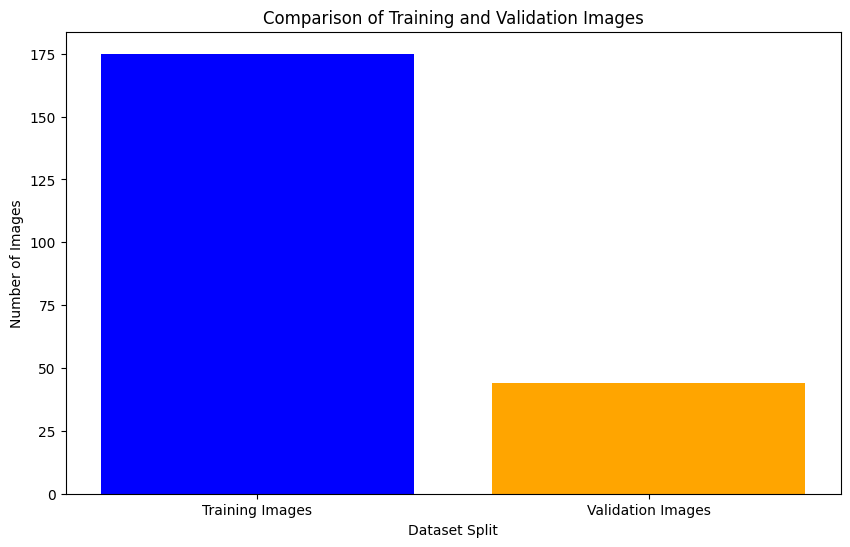

In [ ]:
categories = ['Training Images', 'Validation Images']
num_images = [num_train_images, num_val_images]

plt.figure(figsize=(10, 6))
plt.bar(categories, num_images, color=['blue', 'orange'])
plt.xlabel('Dataset Split')
plt.ylabel('Number of Images')
plt.title('Comparison of Training and Validation Images')
plt.show()

## YOLOv8 Training 

#### Command Arguments

task=detect:

* Purpose: Specifies the task as object detection.
Details: YOLO (You Only Look Once) is designed for object detection. This argument tells YOLO to perform object detection on the provided dataset.

mode=train:

* Purpose: Indicates the mode of operation as training.
Details: YOLO can be used for various purposes such as inference (making predictions) or evaluation. By setting mode=train, you are instructing YOLO to train the model

model=yolov8s.pt:

* Purpose: Specifies the model checkpoint file to use.
Details: yolov8s.pt refers to the YOLOv8 small model checkpoint file. The .pt extension indicates a PyTorch model file. This file contains pre-trained weights that the training process will start from.


data={dataset.location}/data.yaml or data=/content/datasets/waldo7-1/data.yaml:

* Purpose: Provides the path to the dataset configuration file.
Details: {dataset.location} is a placeholder for the actual path to your dataset. data.yaml is the configuration file that contains information about the dataset, such as class names and paths to training and validation images.

epochs=80:

* Purpose: Sets the number of training epochs.
Details: An epoch is one complete pass through the training dataset. Setting epochs=80 means the model will be trained for 80 epochs. More epochs generally improve model performance but require more time.

imgsz=640:

* Purpose: Defines the image size for training.
Details: imgsz=640 resizes each image to 640x640 pixels before feeding it into the model. This size impacts both the training speed and accuracy.

batch=16:

* Purpose: Specifies the batch size.
Details: The batch size is the number of images processed together in one forward/backward pass. A batch size of 16 means that 16 images are processed simultaneously.

optimizer=SGD:

* Purpose: Chooses the optimizer for training.
Details: SGD stands for Stochastic Gradient Descent, an optimization algorithm used to minimize the loss function and update the model weights.


In [63]:


!yolo task=detect mode=train model=yolov8s.pt data=/content/datasets/waldo7-1/data.yaml epochs=80 imgsz=640  batch=16  optimizer=SGD  plots=True

Ultralytics YOLOv8.2.61 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/waldo7-1/data.yaml, epochs=80, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

## Display the Confusion Matrix

* This visualization helps in evaluating the model's performance by illustrating the counts of true positives, false positives, true negatives, and false negatives.

/content


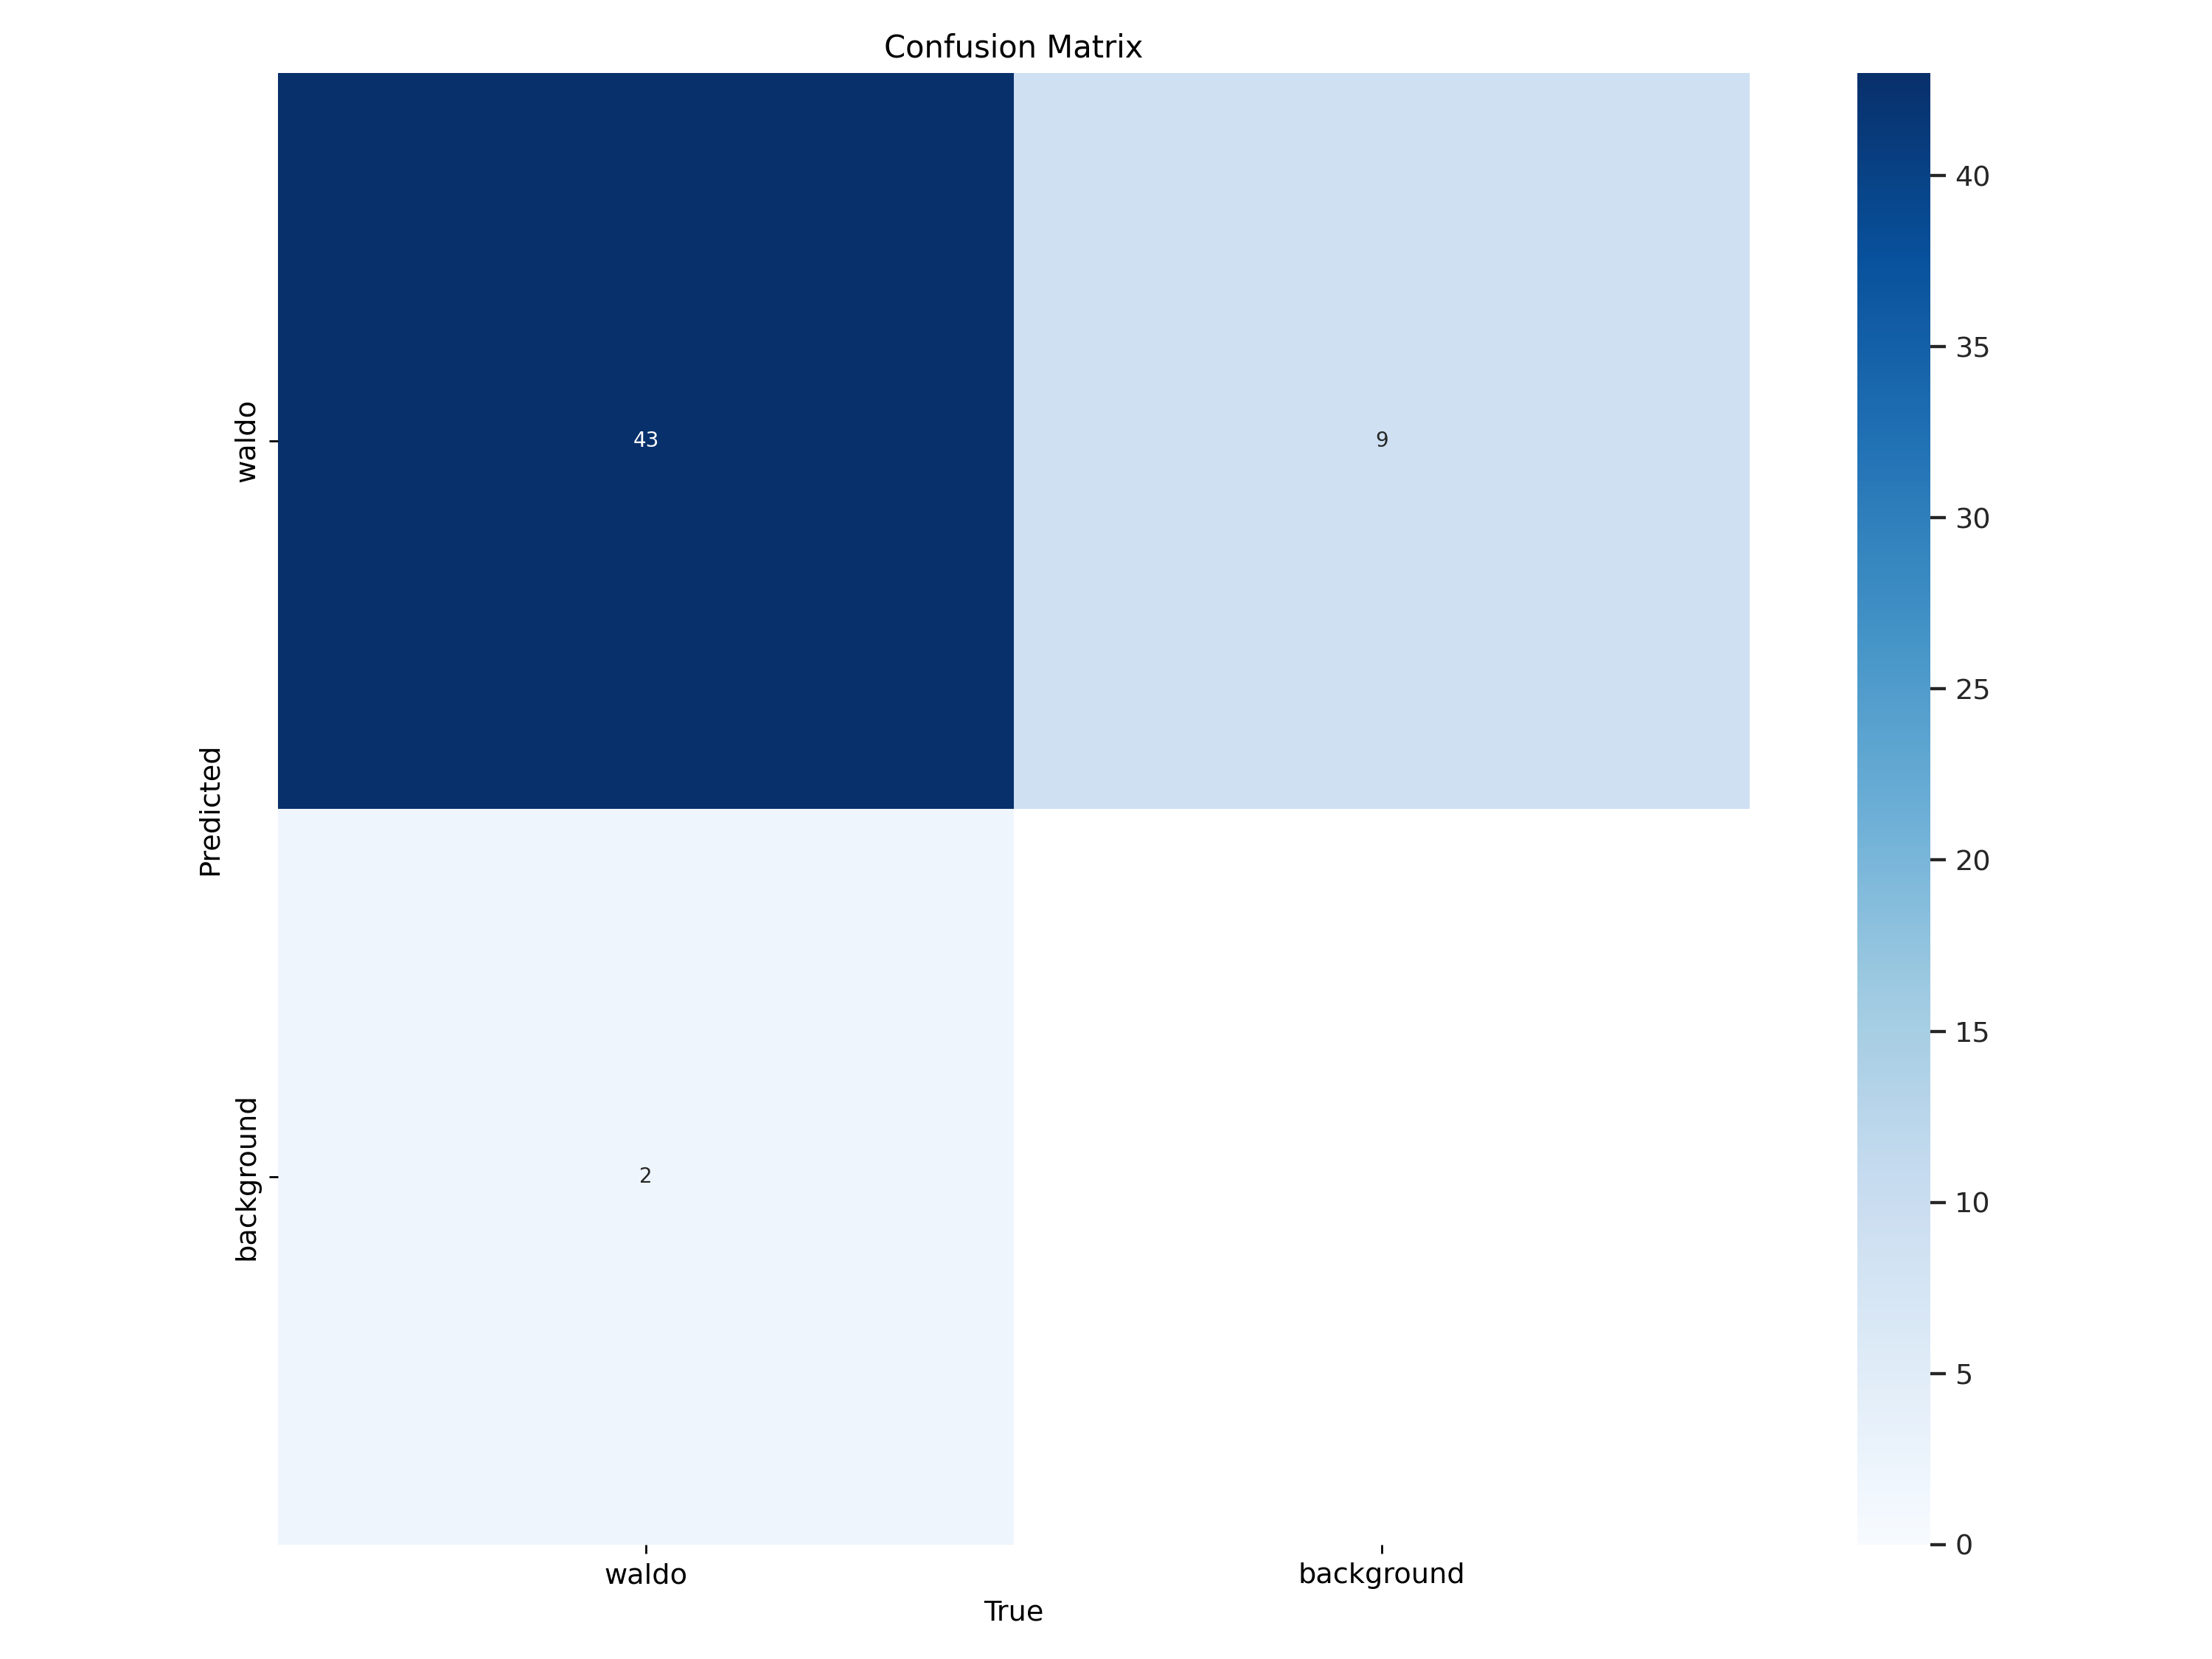

In [64]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train6/confusion_matrix.png', width=900)

## Display the Normalized Confusion Matrix

* The normalized confusion matrix provides a clearer view of the model’s performance by showing the proportion of correctly and incorrectly classified samples relative to the total number of samples. It helps in evaluating the model's performance across different classes by normalizing the counts to percentages.

/content


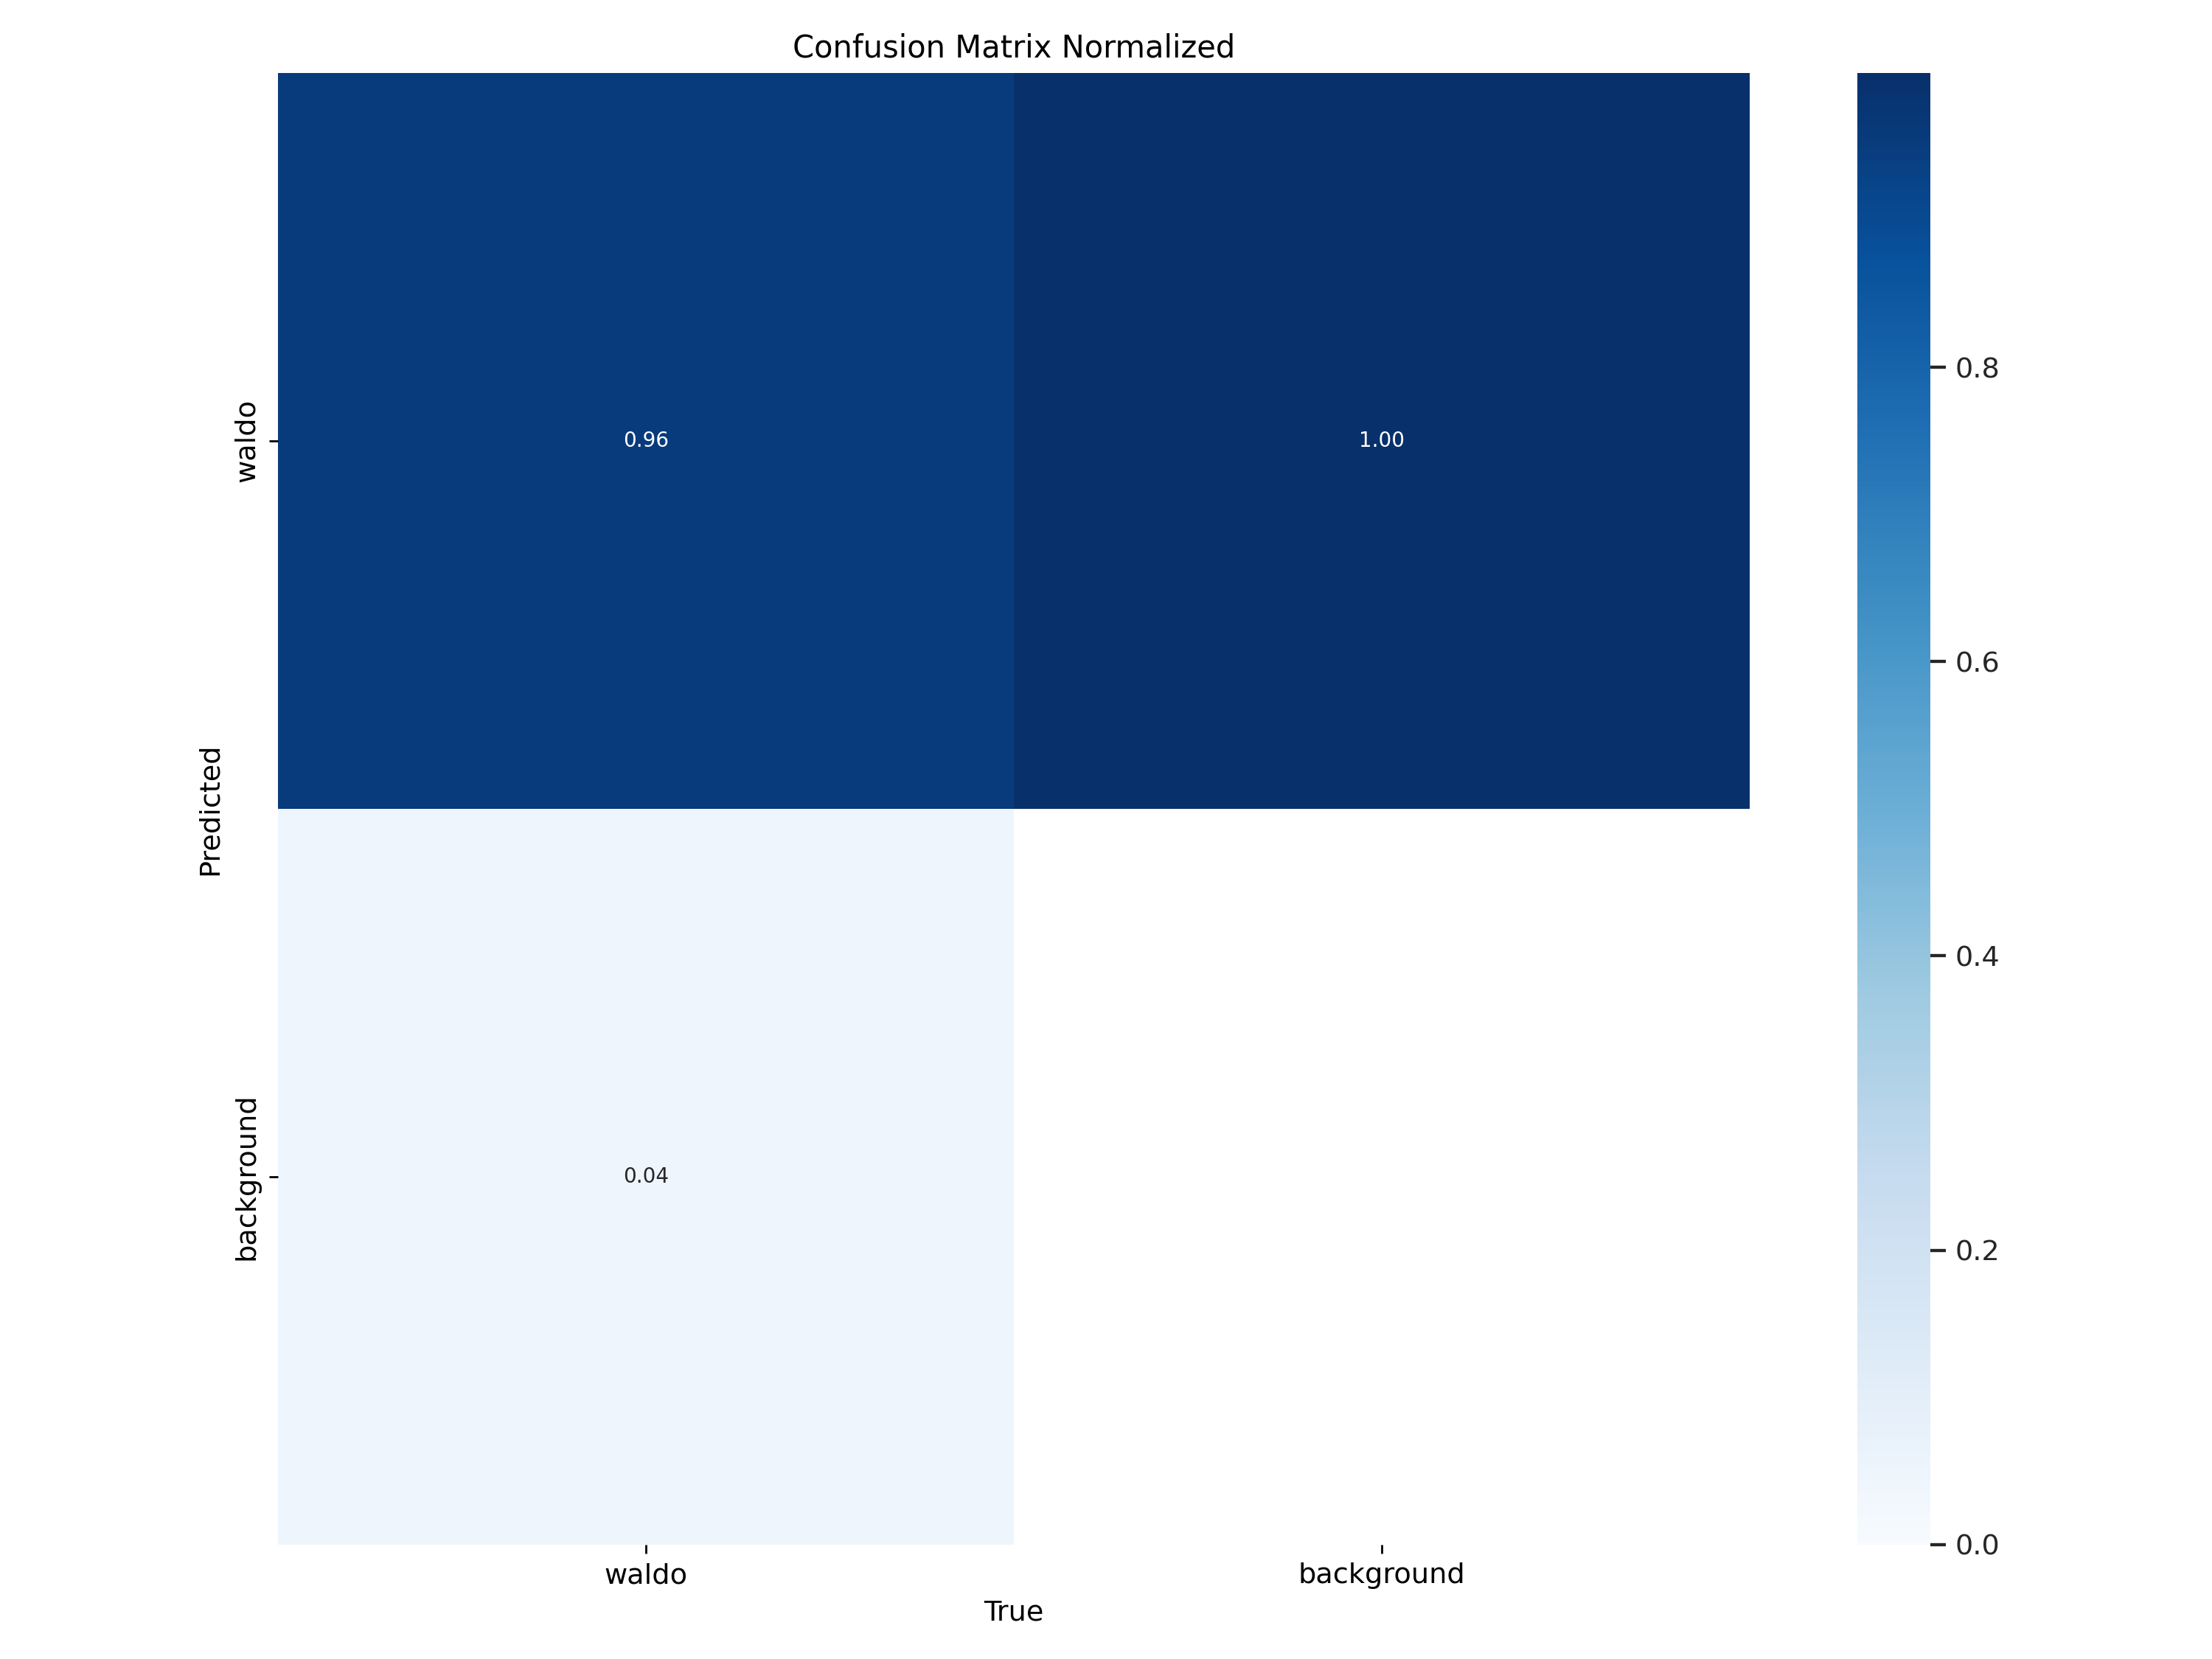

In [65]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train6/confusion_matrix_normalized.png', width=900)

## Display the F1 Score Curve
* This curve helps in understanding how well the model balances precision and recall over different operating points.

/content


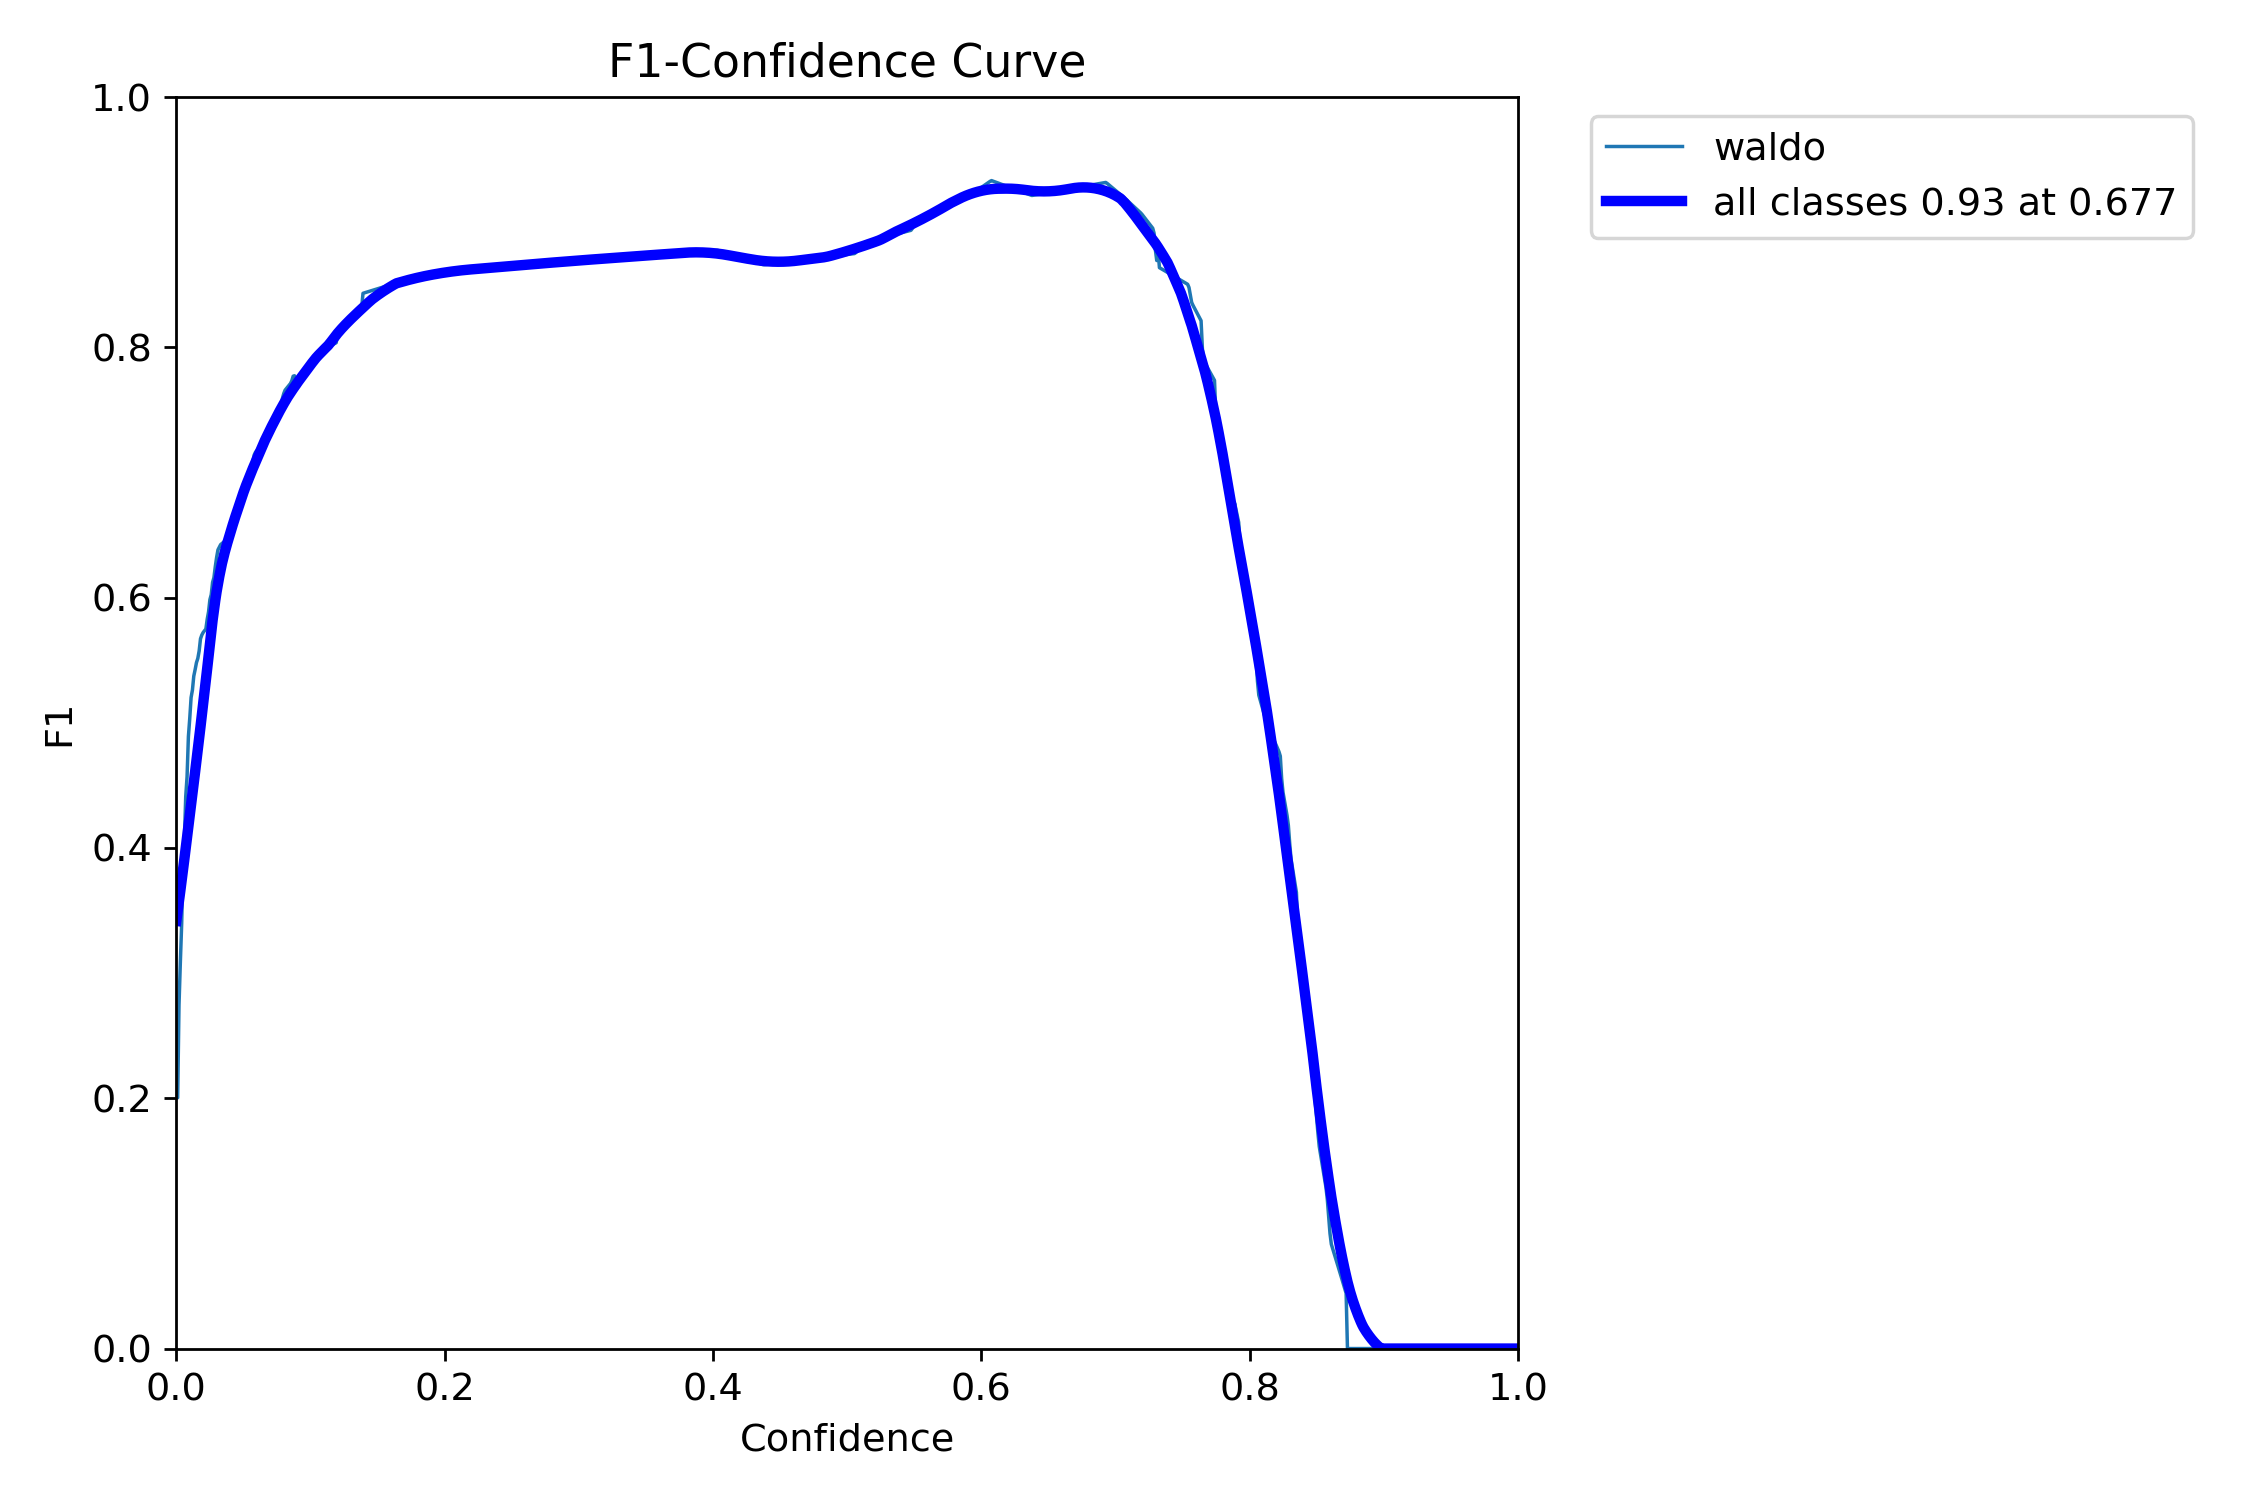

In [66]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train6/F1_curve.png', width=900)

## Display the Results Image

The file typically includes visualizations of the training results, such as detection performance , train loss , valid loss .

/content


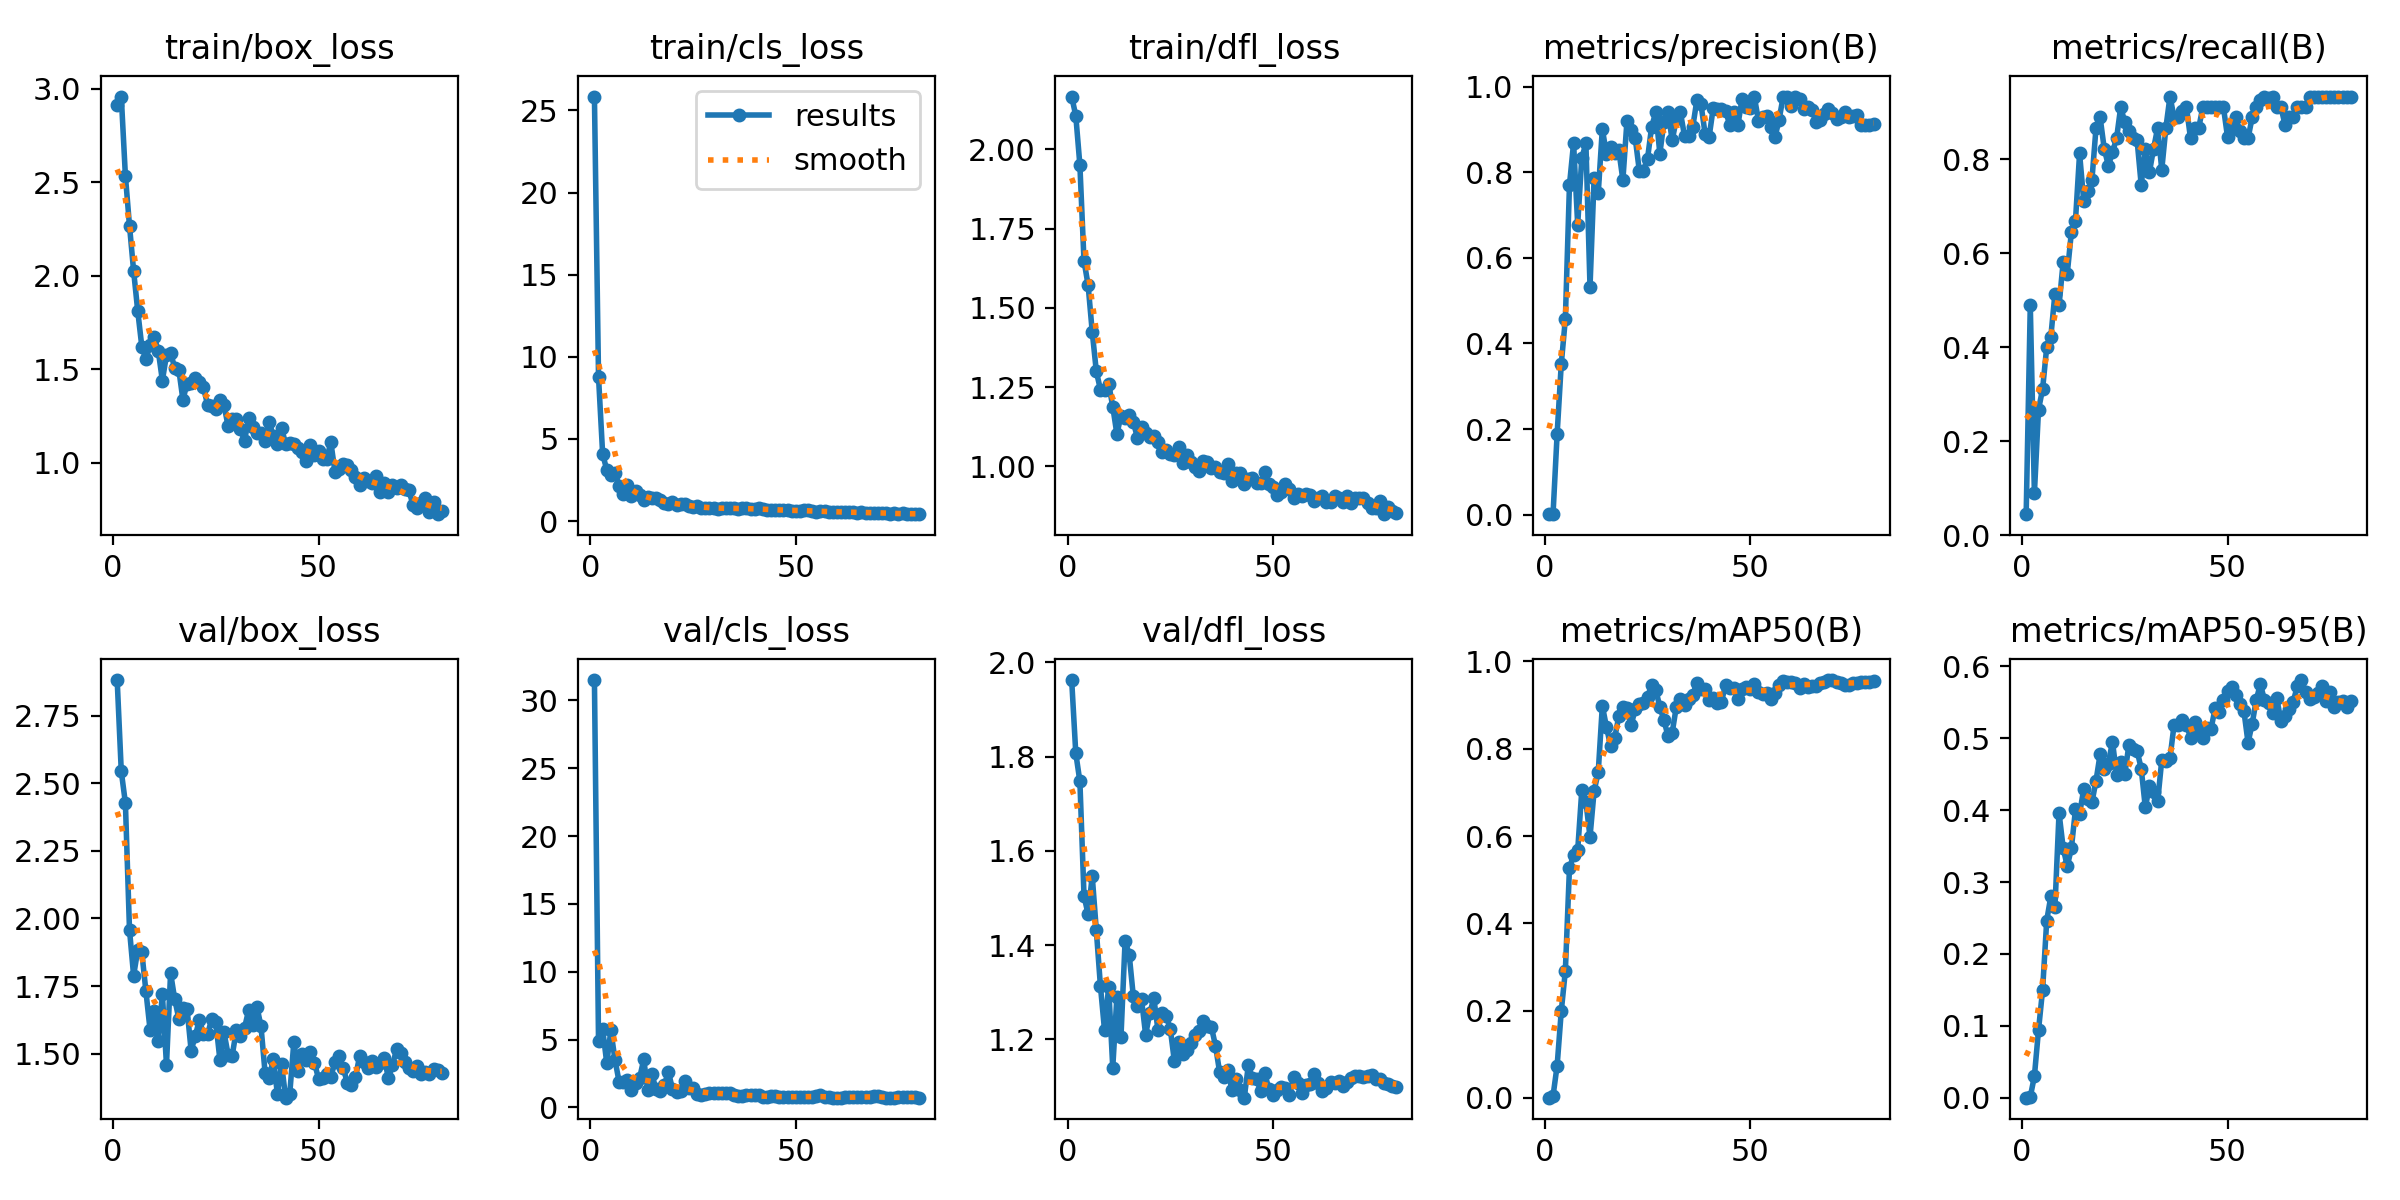

In [67]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train6/results.png', width=900)
#The training and validation loss graphs are printed as well as precison and recall metrics

##  Display an Image with Predictions

* The val_batch0_pred.jpg file shows an image from the validation set with the model's predictions. Each detected object is annotated with its predicted class and the probability (confidence score) that the object belongs to that class. This visualization helps in evaluating how well the model predicts and classifies objects in the validation images.

/content


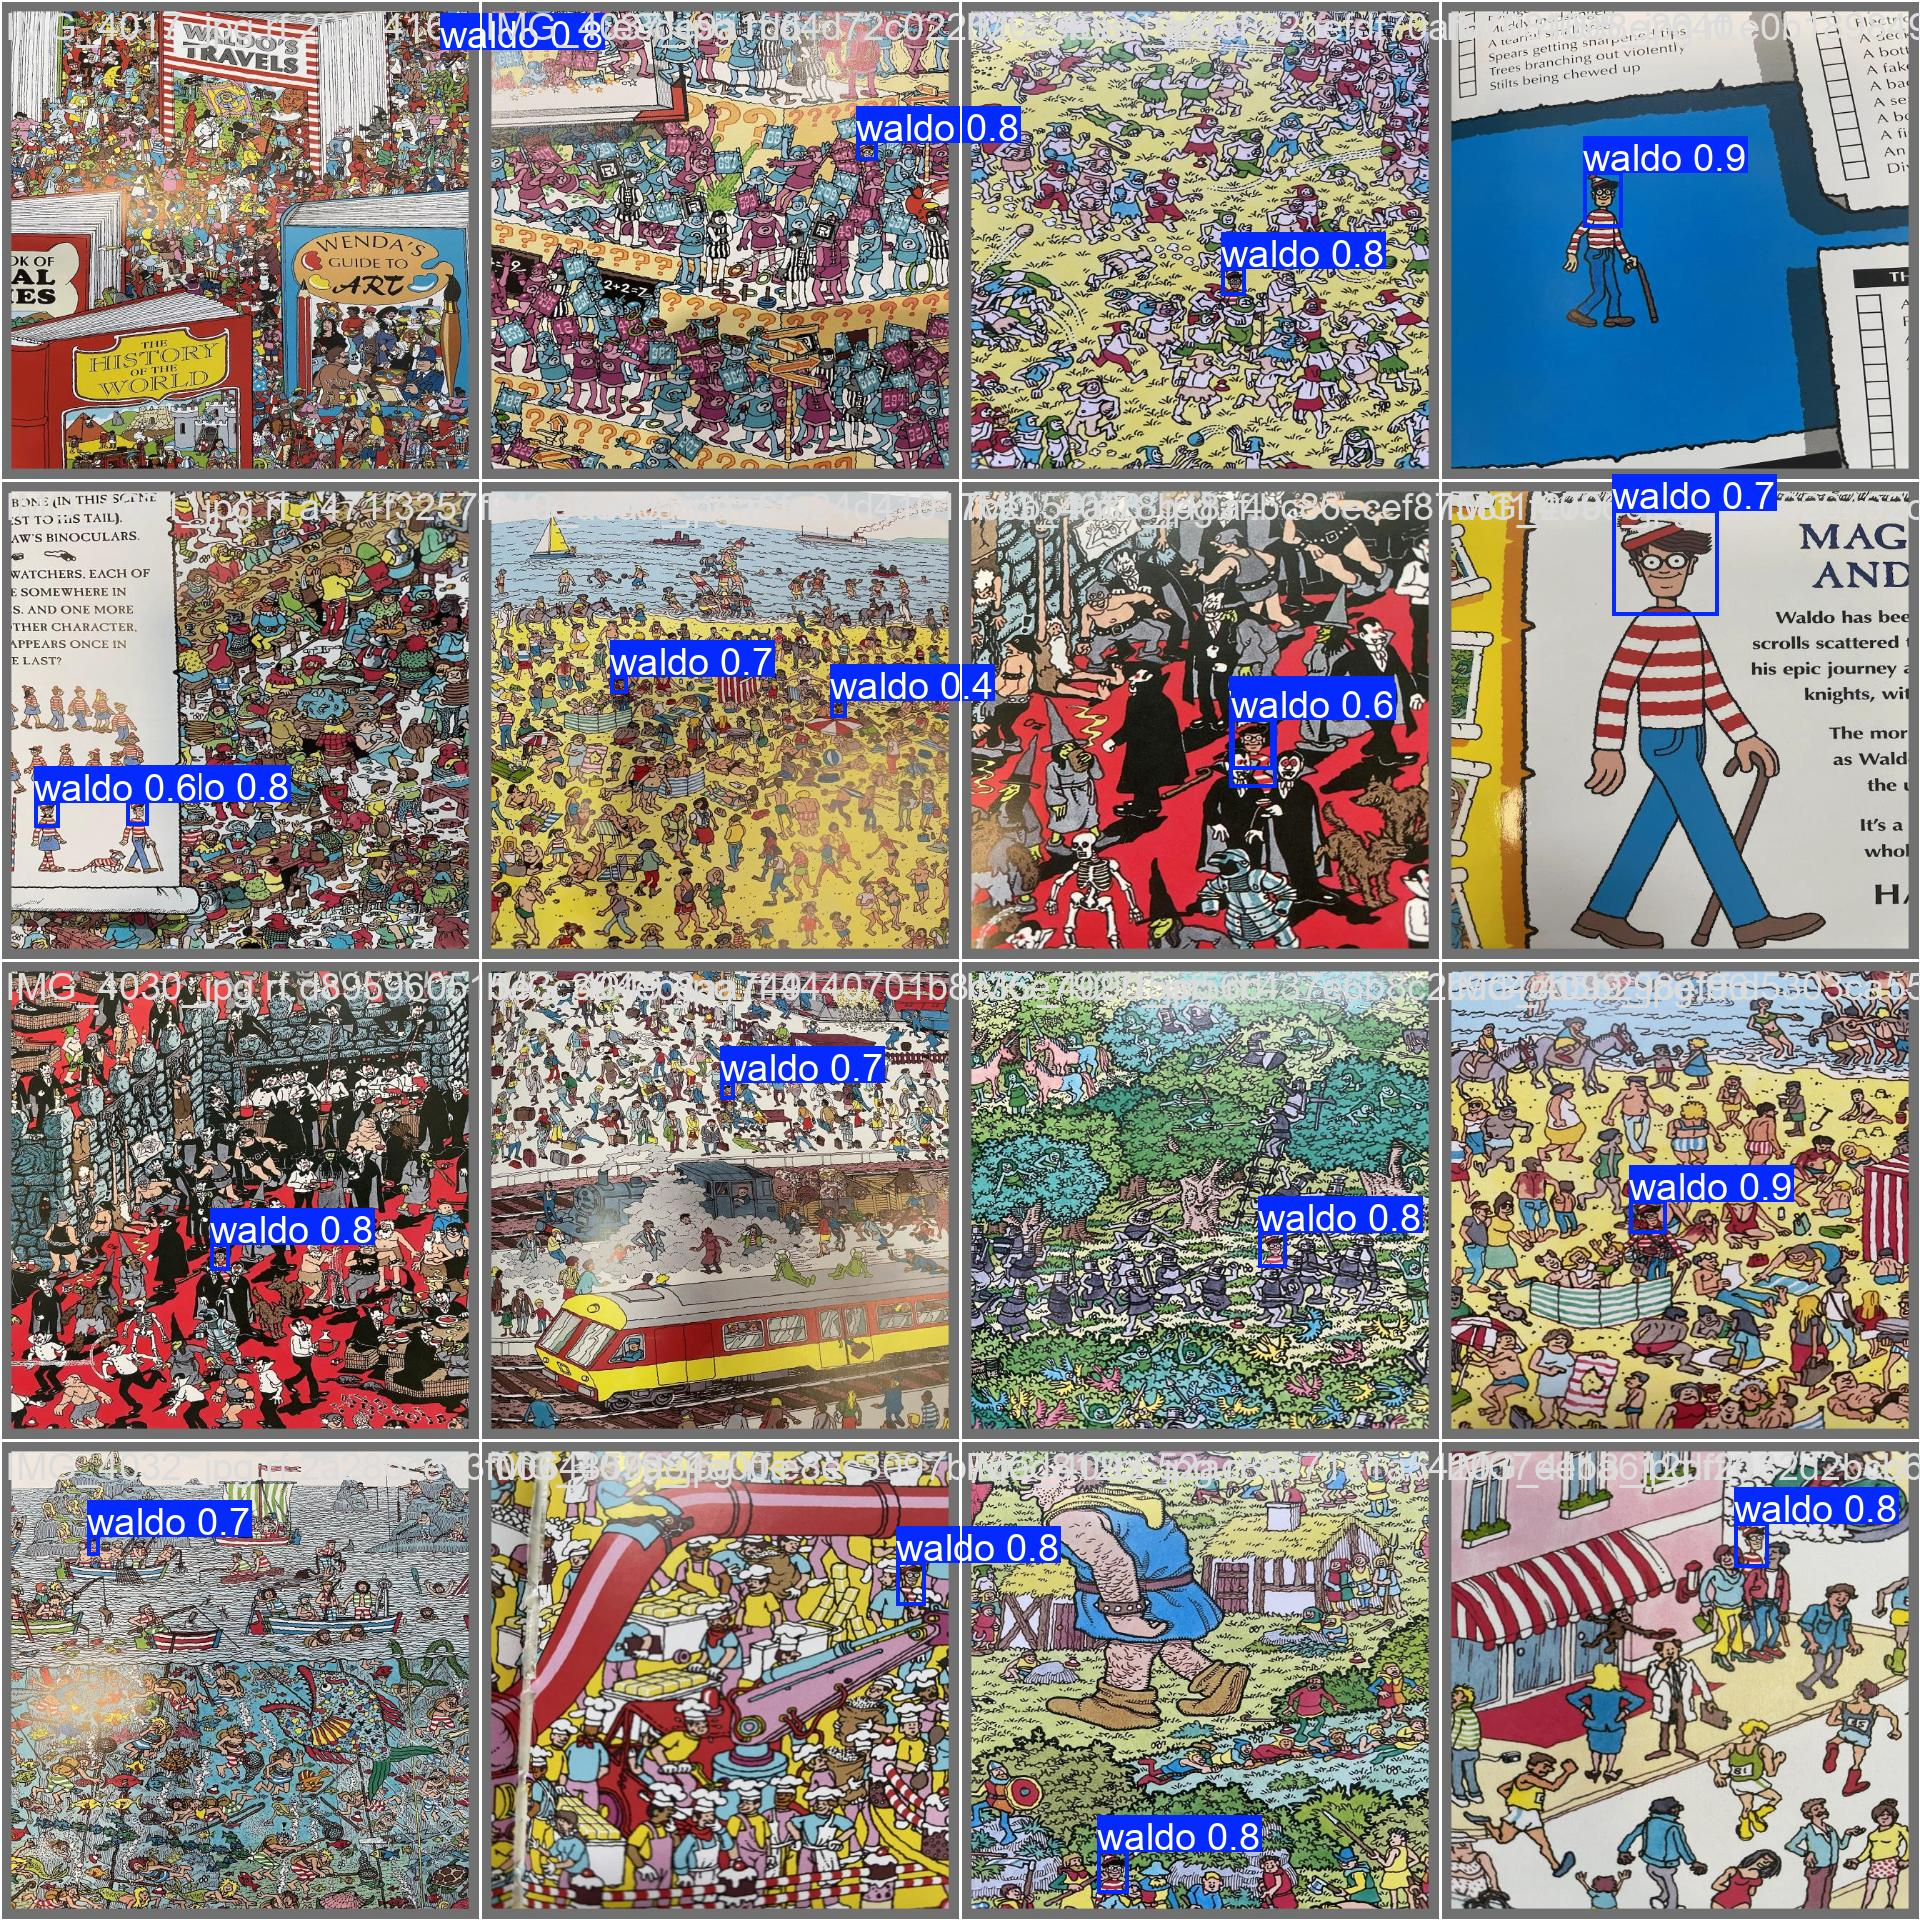

In [68]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train6/val_batch0_pred.jpg', width=600)
#Images from the training set is printed with the probability of each.

## Run YOLOv8 for Validation

The command runs the YOLOv8 CLI tool to validate the trained YOLOv8 model using the specified dataset.


* Precision (P): 0.936 - Indicates the proportion of true positive detections among all detections.

* Recall (R): 0.911 - Indicates the proportion of true positive detections among all actual objects.

* mAP50: 0.953 - Mean Average Precision at IoU threshold 0.50, a standard metric for object detection performance.

* mAP50-95: 0.58 - Mean Average Precision averaged over IoU thresholds from 0.50 to 0.95.

In [71]:
%cd {HOME}

!yolo task=detect mode=val model=/content/runs/detect/train6/weights/best.pt data=/content/datasets/waldo7-1/data.yaml


/content
Ultralytics YOLOv8.2.61 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/waldo7-1/valid/labels.cache... 44 images, 0 backgrounds, 0 corrupt: 100% 44/44 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:02<00:00,  1.21it/s]
                   all         44         45      0.936      0.911      0.953       0.58
Speed: 8.2ms preprocess, 17.0ms inference, 0.0ms loss, 14.7ms postprocess per image
Results saved to runs/detect/val4
💡 Learn more at https://docs.ultralytics.com/modes/val


## Run YOLOv8 for Prediction

* The command runs the YOLOv8 CLI tool to perform object detection on a specified image using a pre-trained model

In [72]:

%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.30 source={HOME}/waldo_1.jpg save=True


/content
Ultralytics YOLOv8.2.61 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/waldo_1.jpg: 384x640 1 waldo, 69.8ms
Speed: 1.7ms preprocess, 69.8ms inference, 670.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [74]:
%cd {HOME}

/content


## Yolov5 setup


* This command fetches the latest YOLOv5 code, models, and scripts from the Ultralytics GitHub repository, allowing you to use and modify YOLOv5 for object detection 

In [19]:
#clone YOLOv5 and
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 16802, done.
remote: Counting objects: 100% (123/123), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 16802 (delta 54), reused 61 (delta 26), pack-reused 16679
Receiving objects: 100% (16802/16802), 15.46 MiB | 15.60 MiB/s, done.
Resolving deltas: 100% (11533/11533), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 804.2/804.2 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the followin

## Setting Up Dataset Directory and Installing Roboflow



To organize the datasets, first create a new directory named `datasets` in your home directory. You can do this using the following command:

In [20]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="vaIQ9aYmyRqVHGw89lcc")
project = rf.workspace("bookdetection-hc8pr").project("waldo7")
version = project.version(1)
dataset = version.download("yolov5")




loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to waldo7-1 in yolov5pytorch:: 100%|██████████| 447/447 [00:00<00:00, 3257.67it/s]


##  YOLOv5 Training


 !python /content/yolov5/train.py:

* Purpose: This script is responsible for training the YOLOv5 model on a specified dataset.

Imgsize 640:

* Purpose: Defines the resolution at which images will be processed during training. Higher resolutions can improve detection accuracy but require more computational resources.

Batchsize 16:

* Purpose: Determines the number of images processed together in one forward/backward pass through the model. A batch size of 16 balances memory usage and training speed.

Epochs 80:

* Purpose: Defines how many times the entire training dataset will be passed through the model. More epochs typically improve the model's performance but increase training time.

data {dataset.location}/data.yaml:

* Purpose: This file contains information about the dataset, including class names and paths to training and validation images. {dataset.location} is a placeholder for the path where the dataset is downloaded.


Yolov5s.pt:

* Purpose: Initializes the model with pre-trained weights for detecting small objects, which can speed up training and improve performance by starting from a model that has already learned useful features.


optimizer SGD:

* What It Does: Chooses Stochastic Gradient Descent (SGD) as the optimization algorithm.
Purpose: Controls how the model weights are updated during training. SGD is a commonly used optimizer that can perform well for many types of neural network models.

cache:

* Purpose: Speeds up training by reducing the need to load images from disk repeatedly. This can significantly improve training time, especially for large datasets.

In [76]:
!python /content/yolov5/train.py --img 640 --batch 16  --epochs 80 --data {dataset.location}/data.yaml --weights yolov5s.pt  --optimizer SGD  --cache

2024-07-22 01:34:59.950305: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-22 01:34:59.950376: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-22 01:34:59.953043: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/yolov5/waldo7-1/data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=80, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=yolov5/data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, mult

## Display the Confusion Matrix

* This visualization helps in evaluating the model's performance by illustrating the counts of true positives, false positives, true negatives, and false negatives.

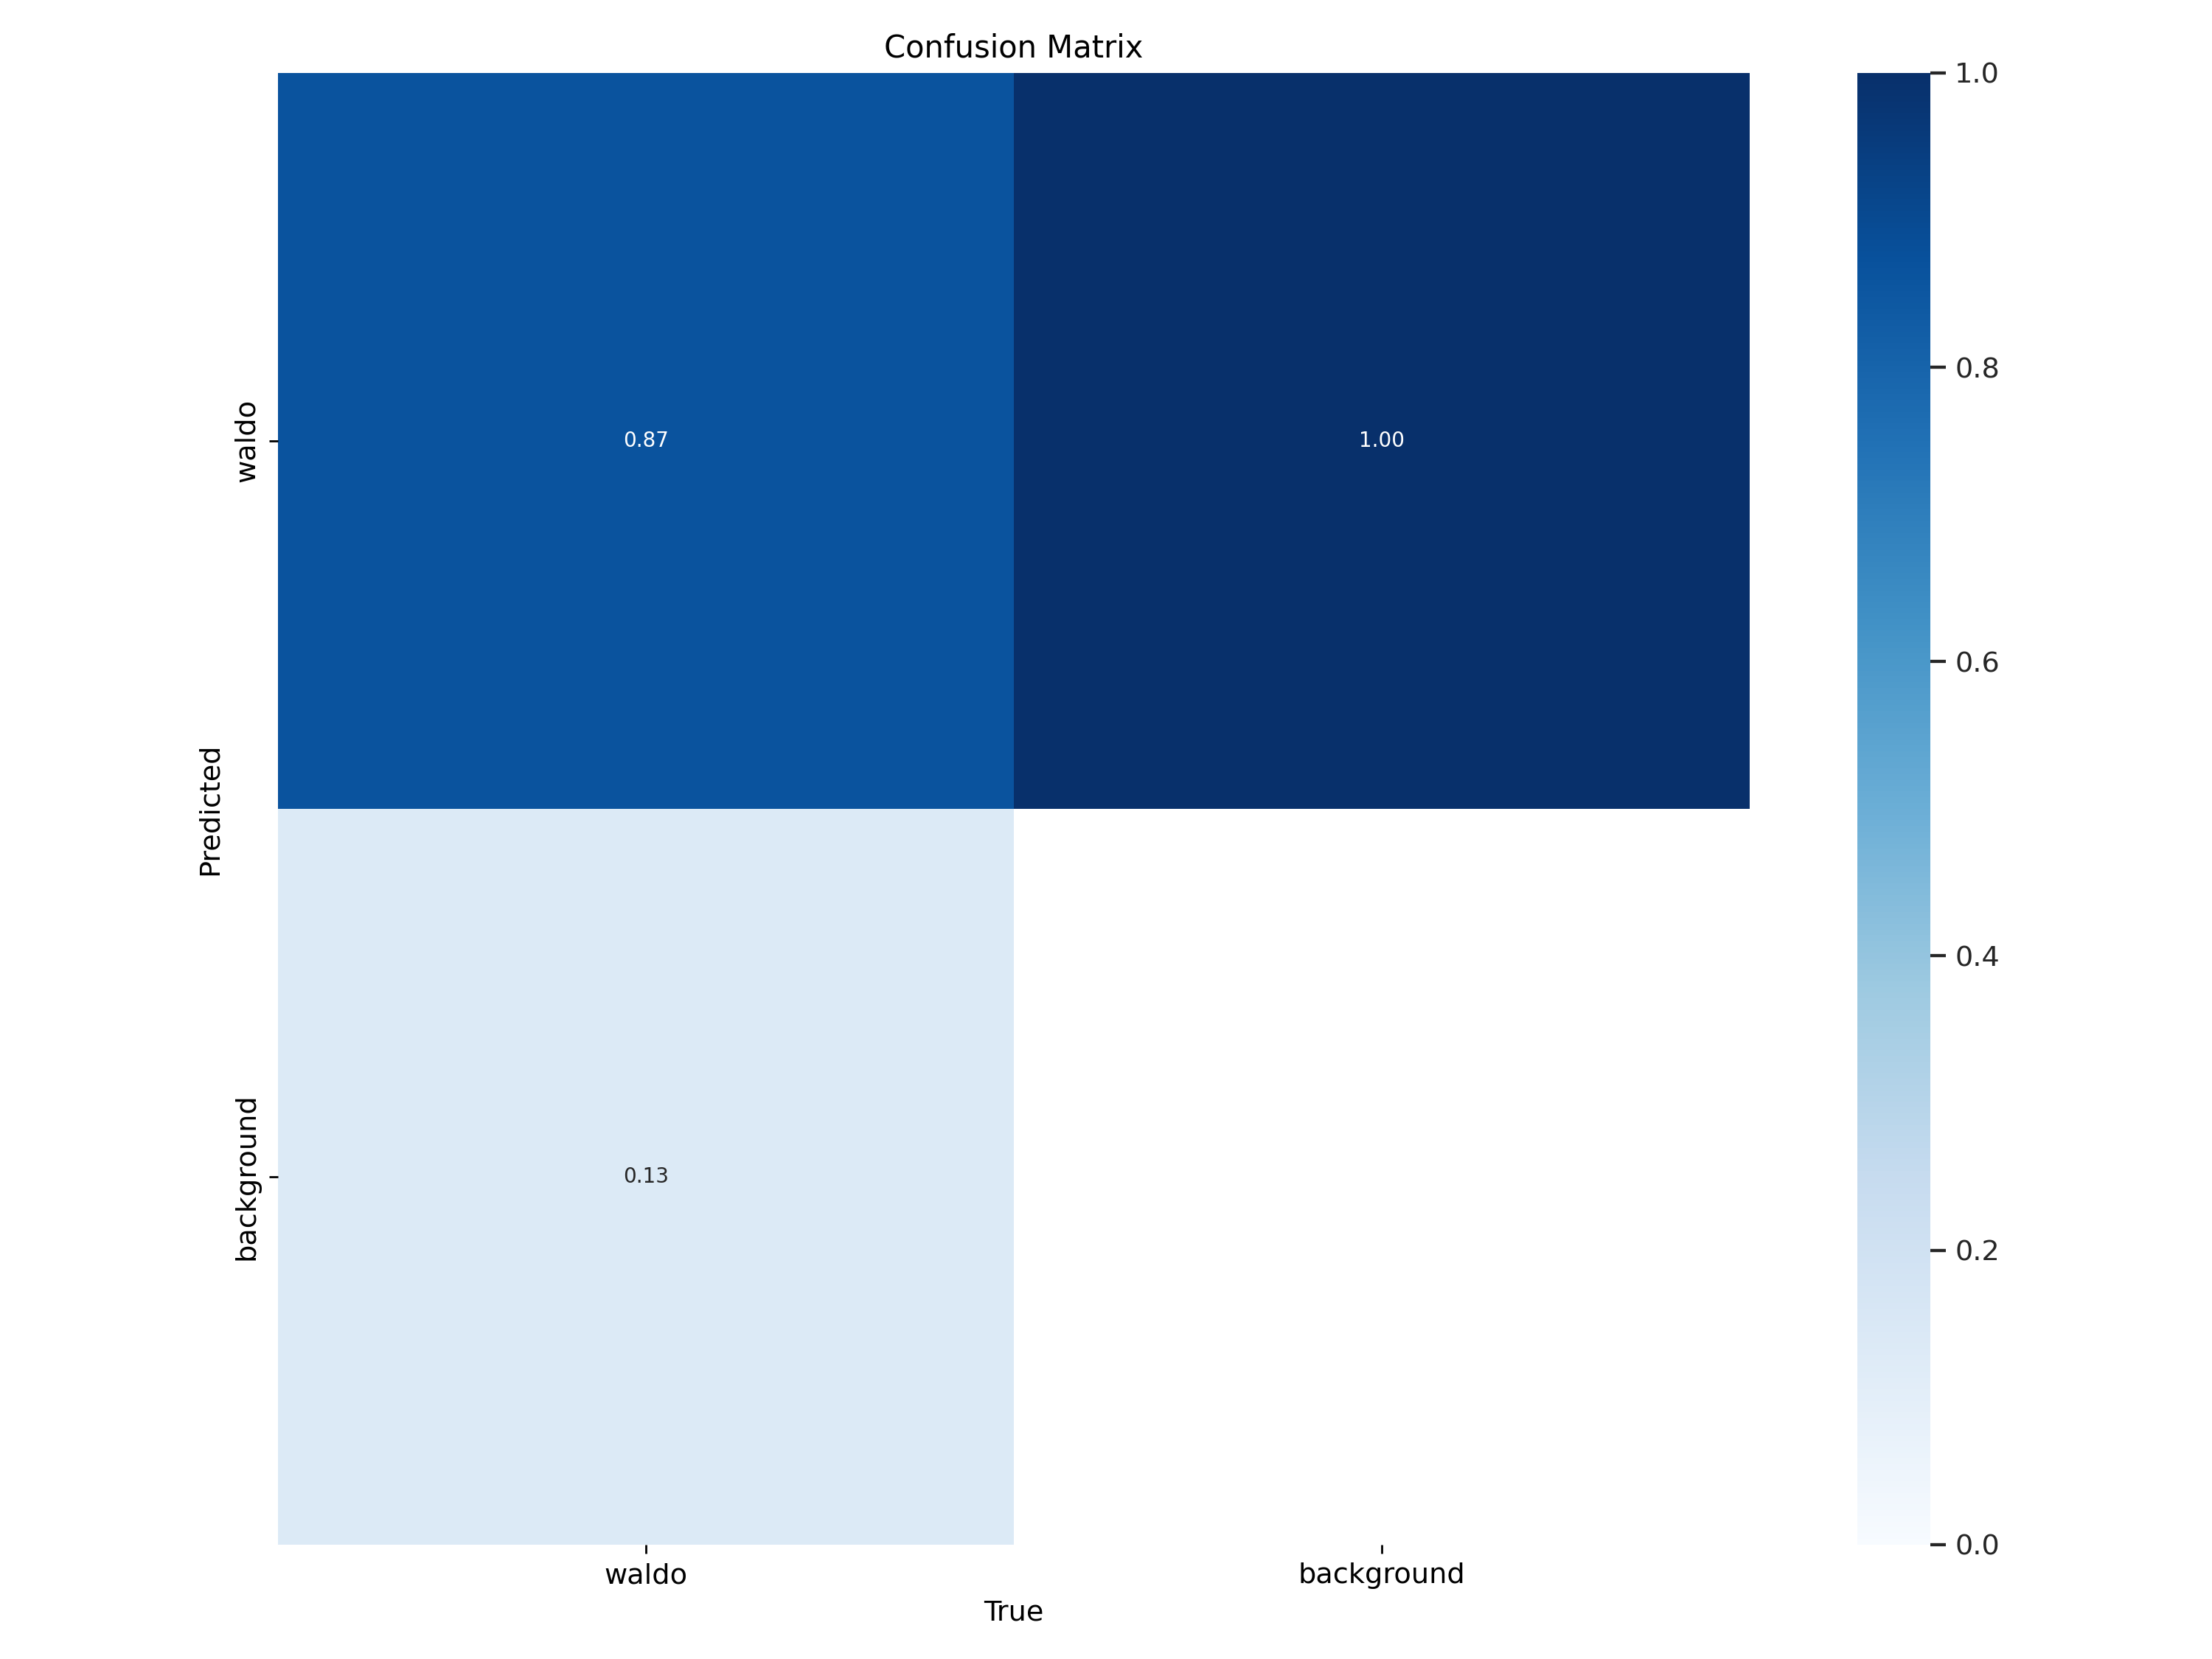

In [77]:

Image(filename=f'/content/yolov5/runs/train/exp6/confusion_matrix.png', width=900)

## Display the F1 Score Curve


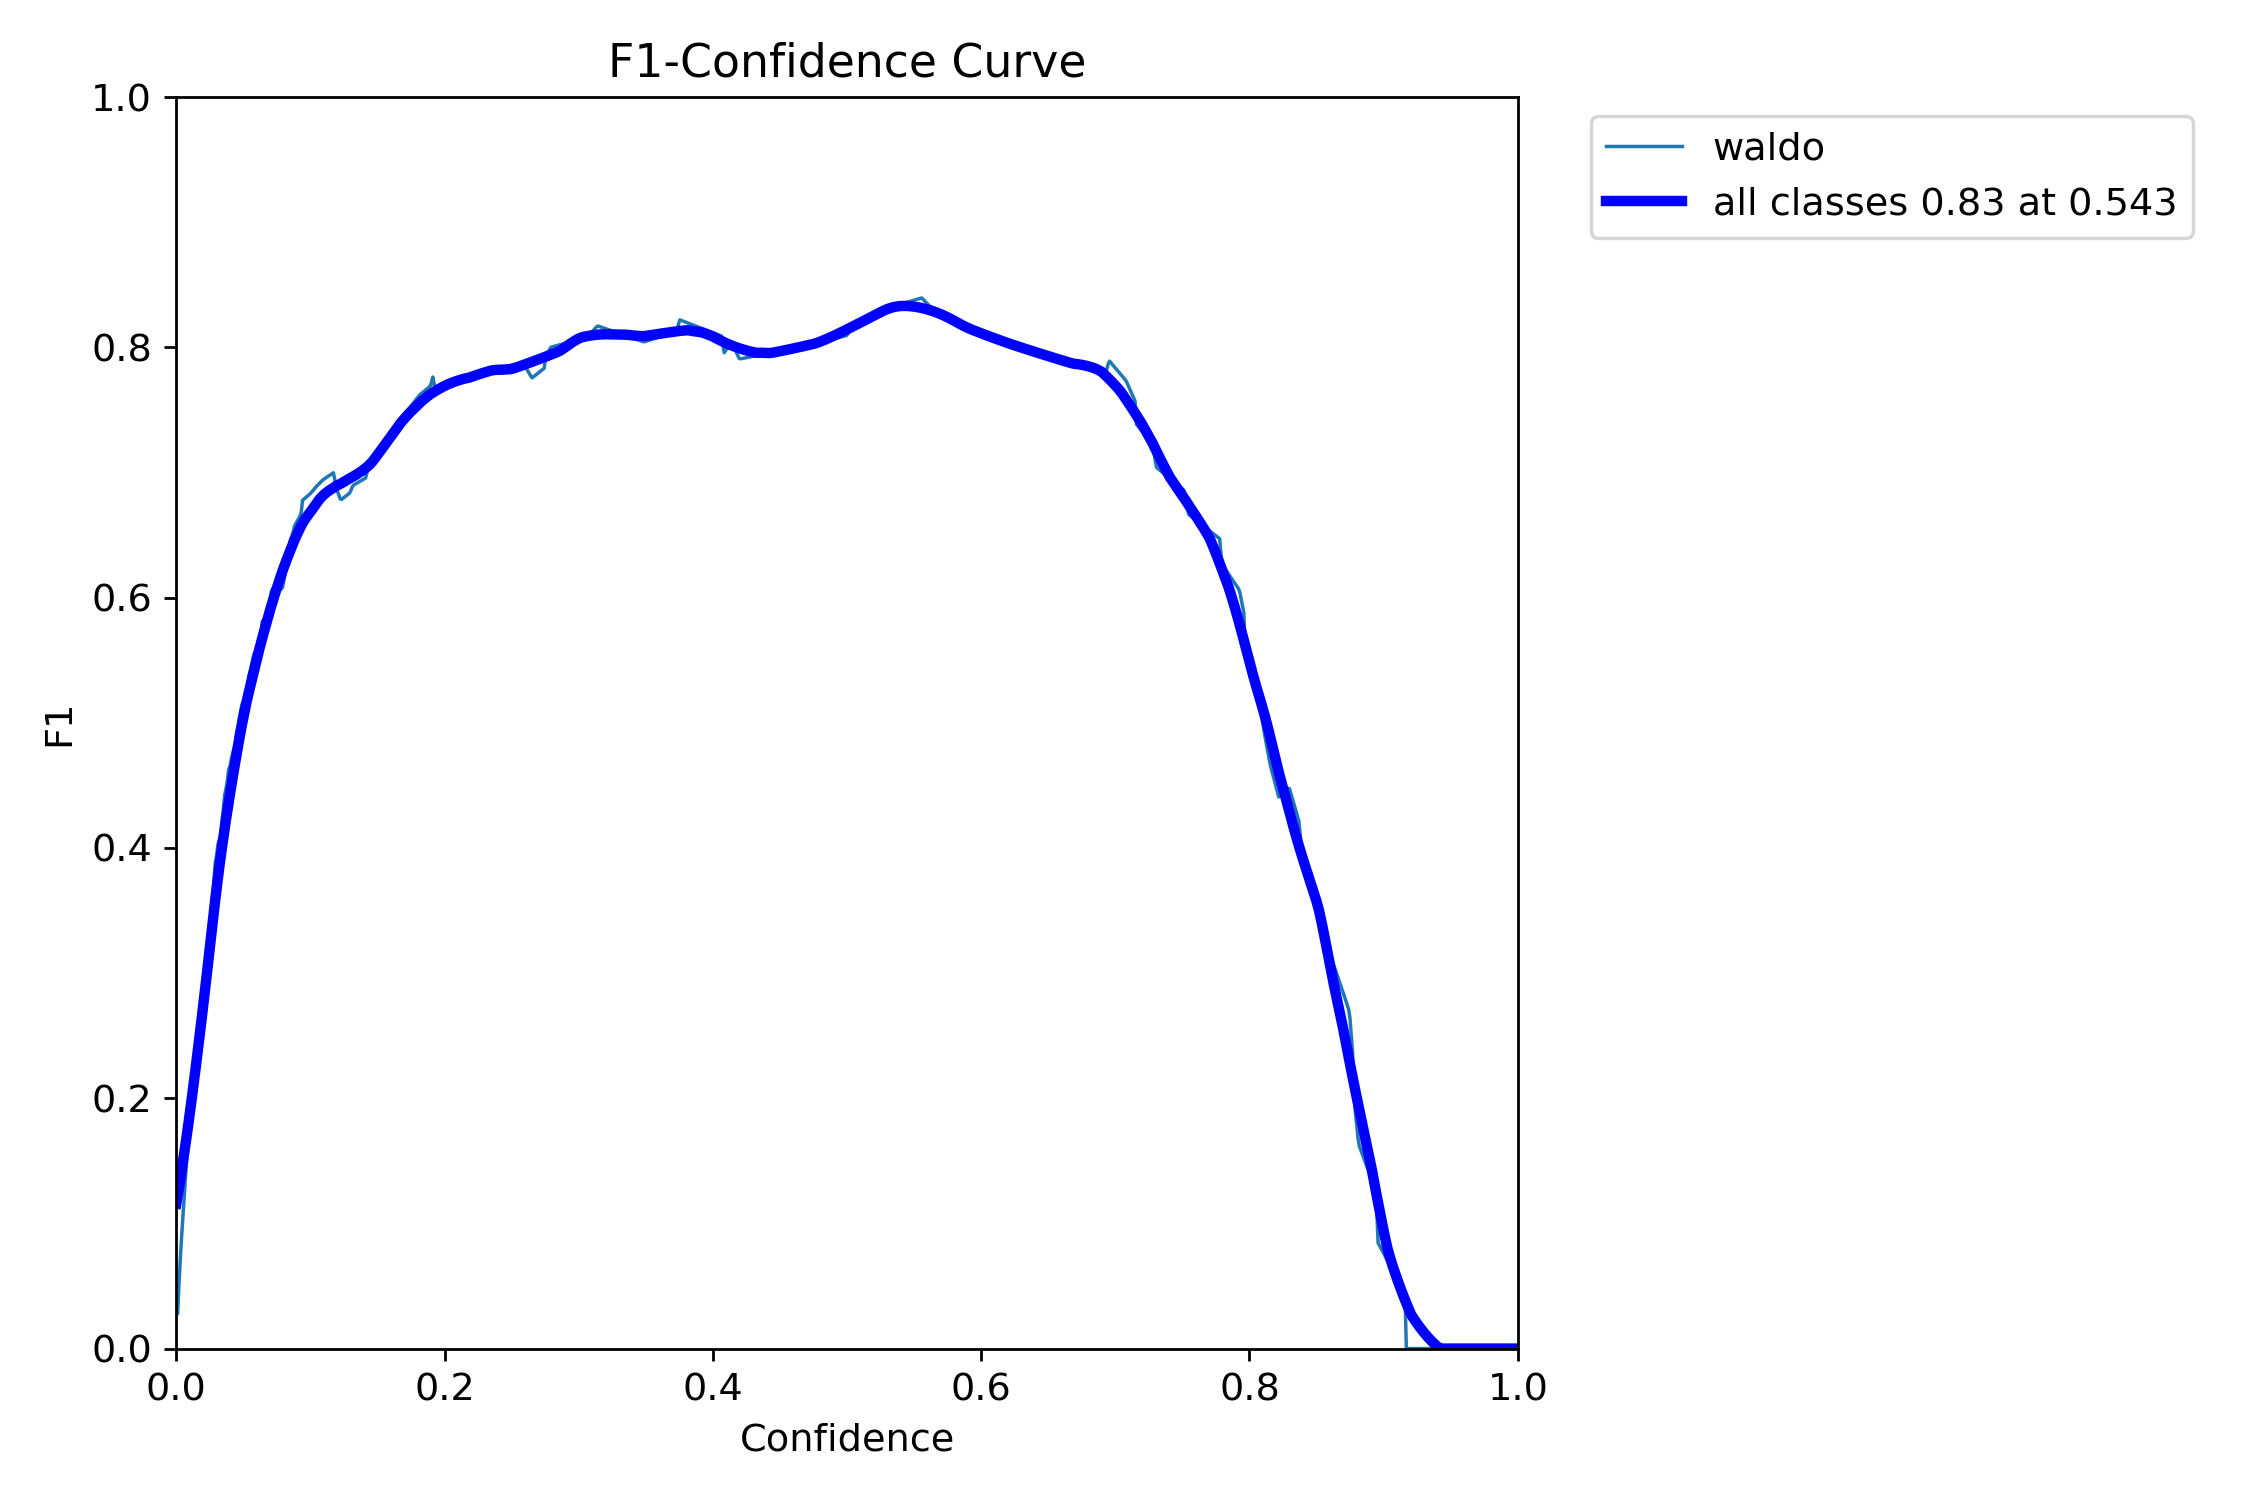

In [78]:
Image(filename=f'/content/yolov5/runs/train/exp6/F1_curve.png', width=900)

## Display the Results Image

The file typically includes visualizations of the training results.

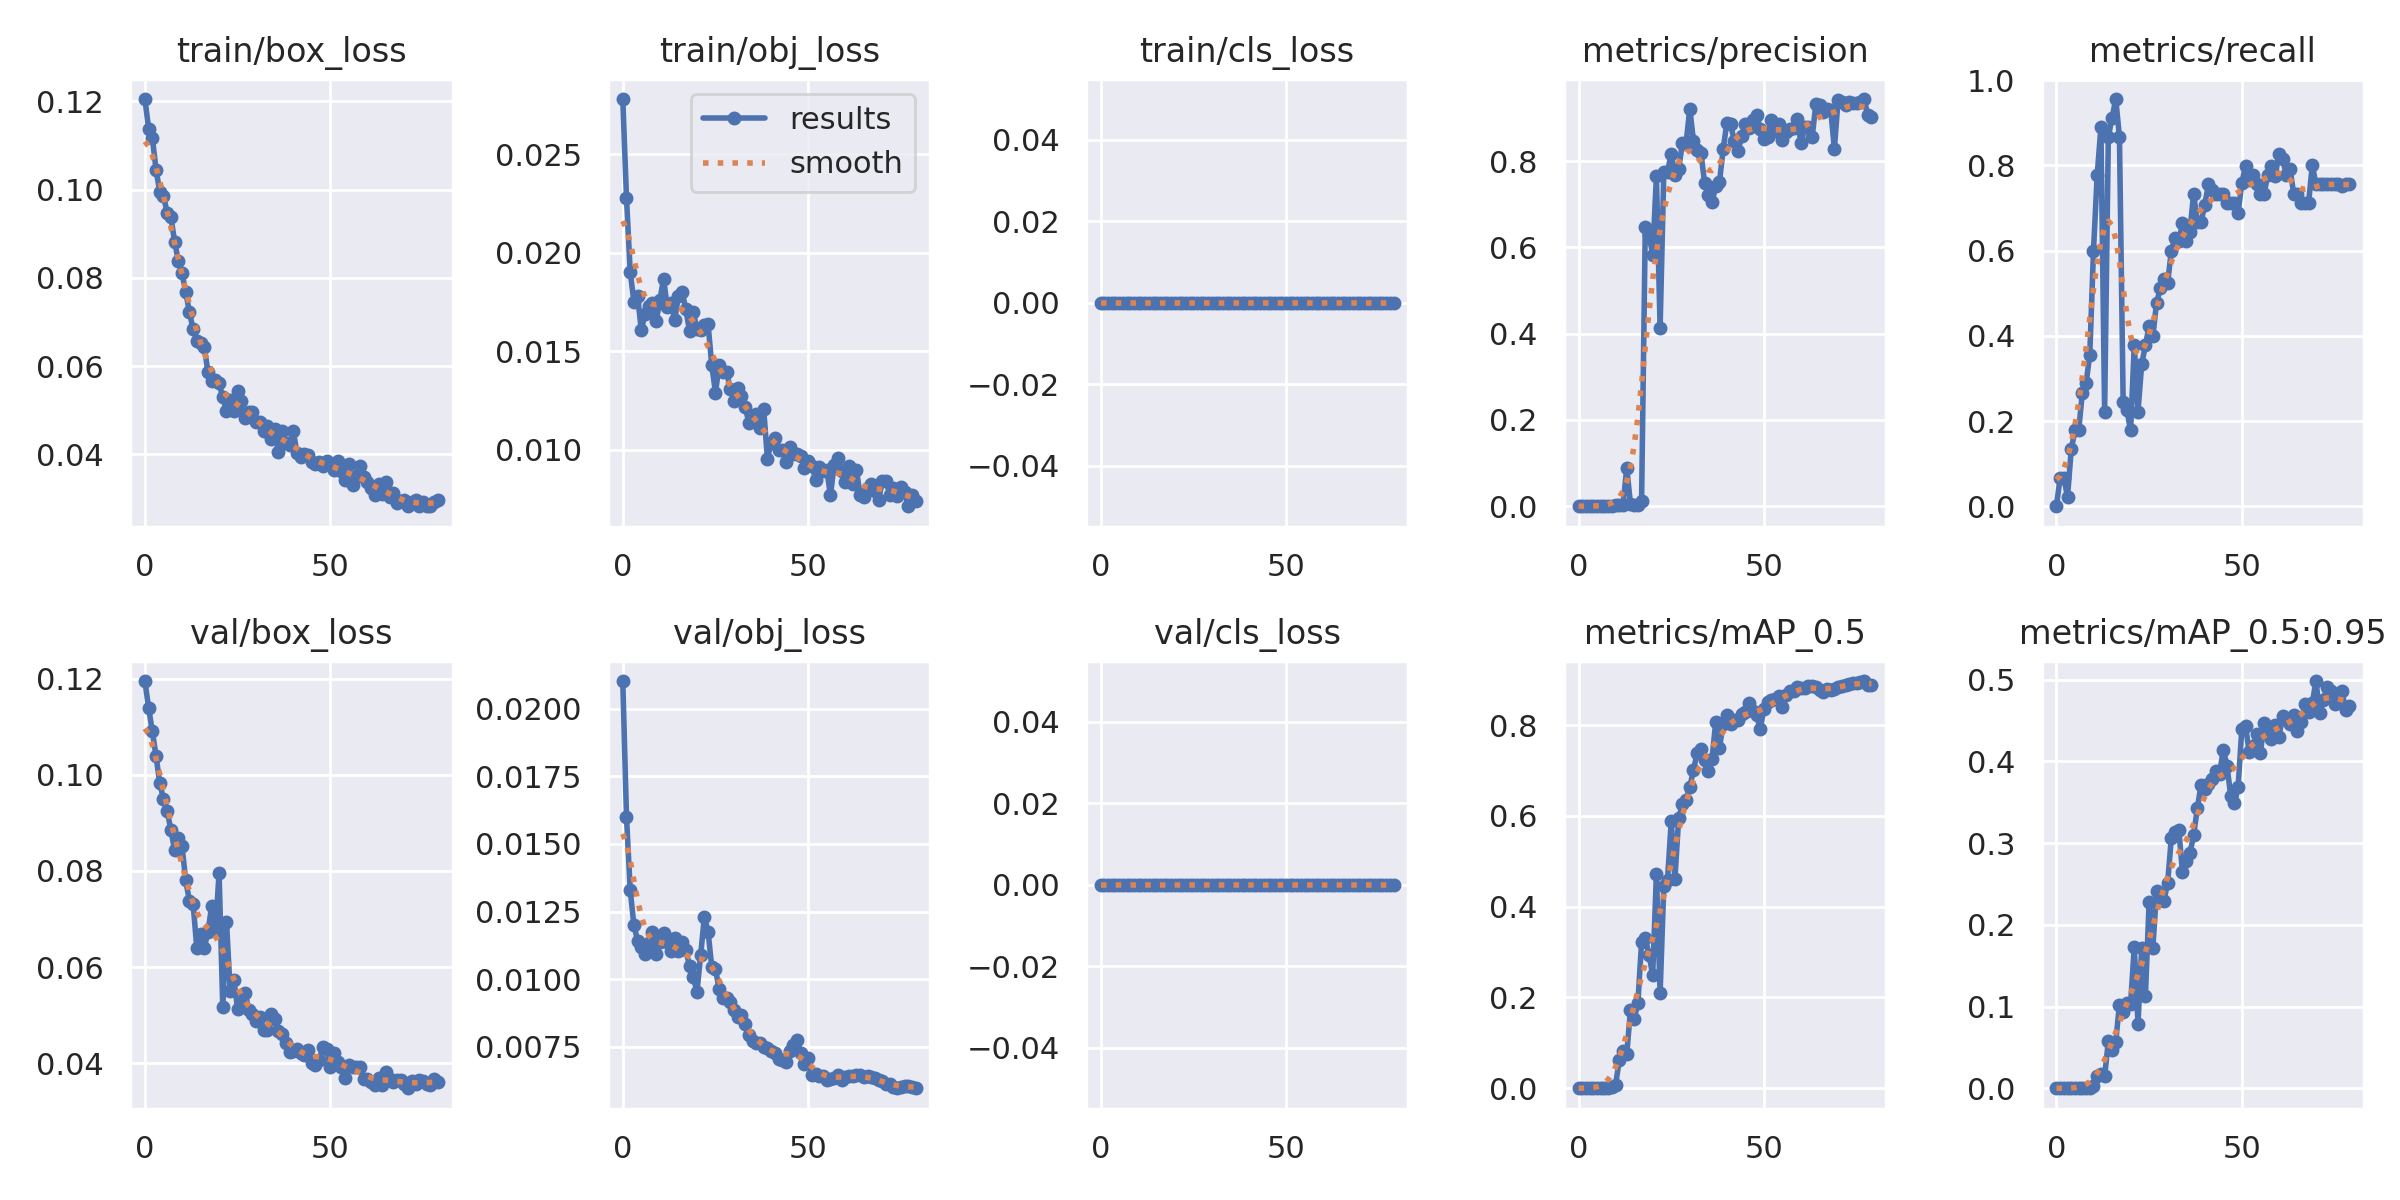

In [79]:
Image(filename=f'/content/yolov5/runs/train/exp6/results.png', width=900)

##  Display an Image with Predictions

*  This visualization helps in evaluating how well the model predicts and classifies objects in the validation images.

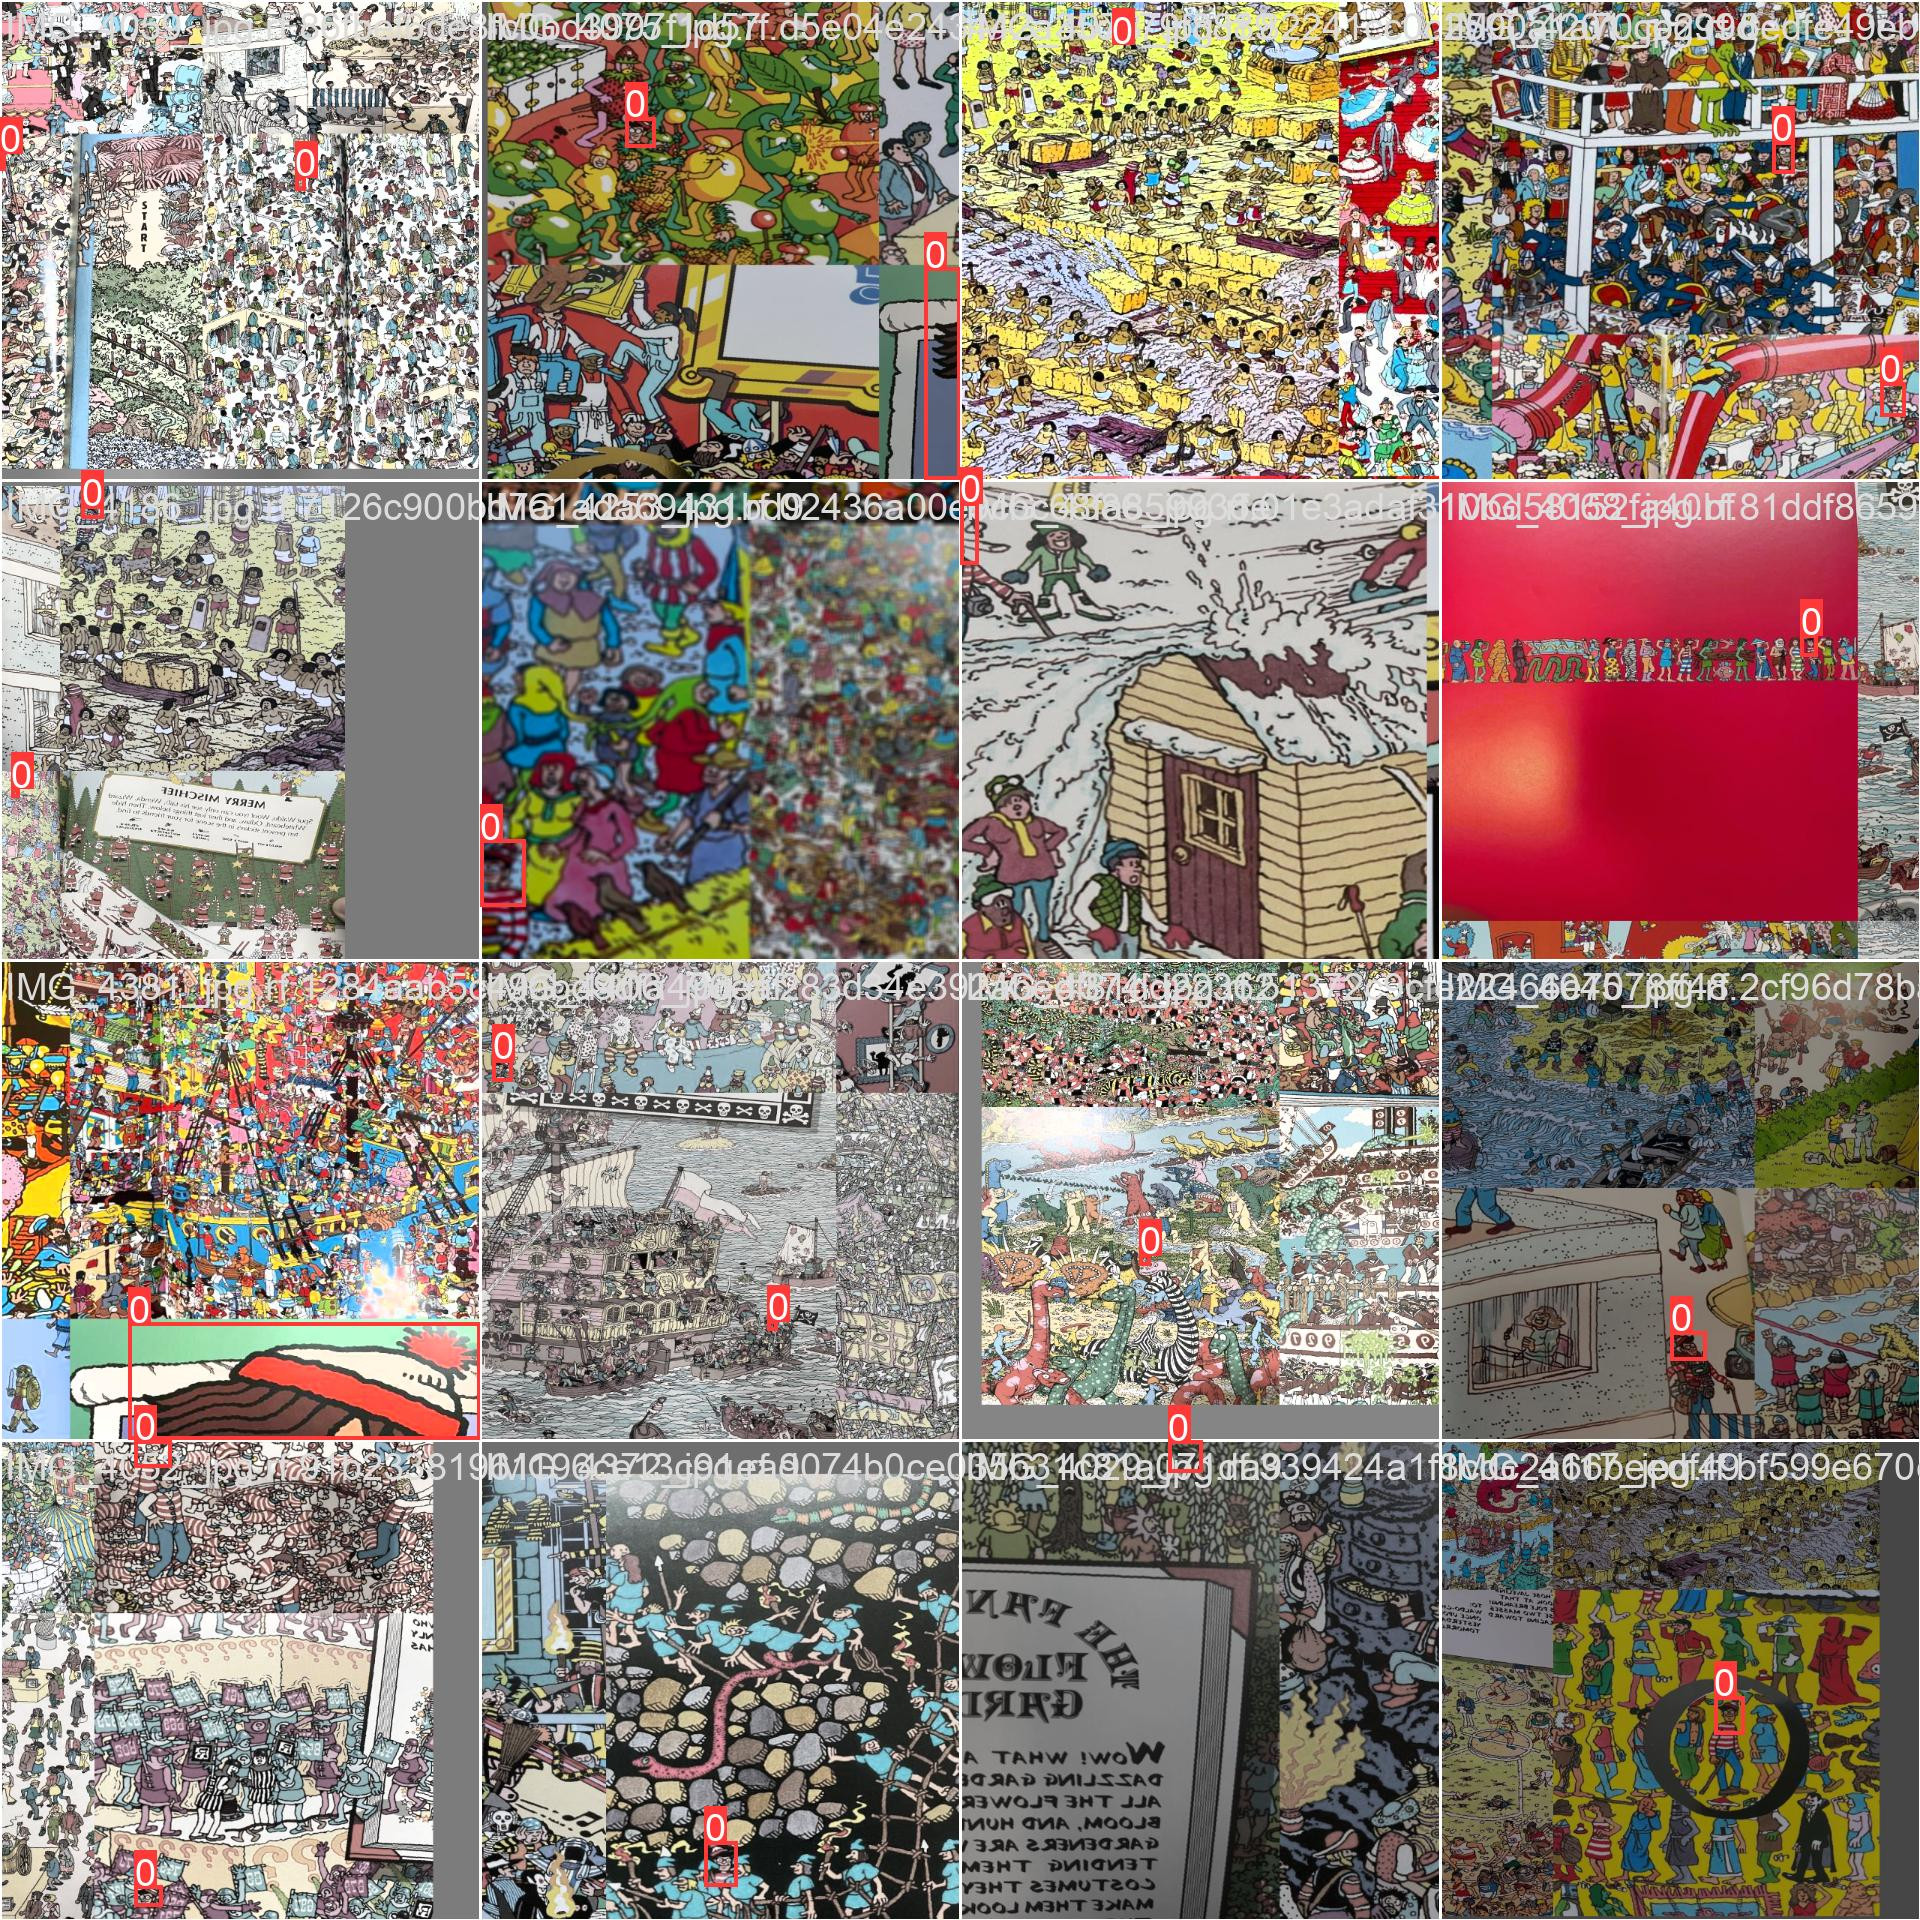

In [80]:

Image(filename=f'/content/yolov5/runs/train/exp6/train_batch1.jpg', width=900)

# Run YOLOv5 for Prediction

* The command runs the YOLOv5 CLI tool to perform object detection on a specified image using a pre-trained model

In [81]:
!python /content/yolov5/detect.py --weights /content/yolov5/runs/train/exp6/weights/best.pt --img 640 --conf 0.3 --source /content/waldo_1.jpg

detect: weights=['/content/yolov5/runs/train/exp6/weights/best.pt'], source=/content/waldo_1.jpg, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-345-g8003649c Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/waldo_1.jpg: 384x640 4 waldos, 51.4ms
Speed: 0.5ms pre-process, 51.4ms inference, 530.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5/runs/detect/exp3


# SAHI (Slicing Aided Hyper Inference)

## Overview

SAHI, short for Slicing Aided Hyper Inference, is a method designed to improve the performance and accuracy of object detection models, especially on large images or images with densely packed objects. It works by slicing large images into smaller, more manageable pieces, performing inference on these smaller slices, and then combining the results.


## Key Features

1. **Slicing Large Images**:
   - SAHI slices large images into smaller tiles, enabling the model to process each tile independently. This approach is particularly useful for high-resolution images where objects might be small and spread across a large area.



2. **Handling Dense Object Regions**:
   - By breaking down the image, SAHI allows for better detection in densely populated object areas. Smaller slices mean the model can focus on detailed regions without being overwhelmed by the entire image's complexity.


3. **Combining Results**:
   - After processing the slices, SAHI merges the detection results to form a cohesive output. This ensures that objects detected in different slices are correctly mapped back to their original positions in the large image.


4. **Improving Detection Accuracy**:
   - The slicing mechanism helps in improving the overall detection accuracy by ensuring that objects at different scales and positions are effectively detected without being missed due to image size constraints.



## How SAHI Works


### 1. Image Slicing

The input image is divided into smaller overlapping or non-overlapping tiles. Overlapping tiles can help in ensuring that objects near the edges of slices are not missed.


### 2. Model Inference


Each tile is then fed independently to the object detection model (like YOLO). The model processes each tile and returns detection results for that specific region.



### 3. Post-Processing

The detection results from all the tiles are then combined. This step involves adjusting the coordinates of the detected objects to their original positions in the large image.




In [ ]:
from sahi.utils.yolov8 import (
    download_yolov8s_model
)

from sahi import AutoDetectionModel
import torch
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict
from sahi.predict import visualize_object_predictions
from IPython.display import Image
from numpy import asarray
from ultralytics import YOLO

yolov8_model_path = "your_model_path"
download_yolov8s_model(yolov8_model_path)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

detection_model = AutoDetectionModel.from_pretrained(
    model_type='yolov8',
    model_path=yolov8_model_path,
    confidence_threshold=0.55,
    device=device, # or 'cuda:0'
)

image_path = 'your_image_path'

result = get_prediction(image_path, detection_model)
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")


result = get_sliced_prediction(
    image_path,
    detection_model,
    slice_height = 256,
    slice_width = 256,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2
)

result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

# Conclusion: YOLOv8 vs YOLOv5 

## Performance Comparison

While both YOLOv5 and YOLOv8 are highly effective object detection models, YOLOv8 has shown substantial improvements over YOLOv5 in various aspects, even when SAHI (Slicing Aided Hyper Inference) is applied. Here's a comparison highlighting why YOLOv8 often outperforms YOLOv5:

## Metrics Comparison:
YOLOv5:
* Precision: 0.94
  Indicates that 94% of the detections made by YOLOv5 are correct.


* Recall: 0.756
  Indicates that YOLOv5 detects 75.6% of all actual objects.


* mAP50 (Mean Average Precision at IoU threshold 0.50): 0.883
  YOLOv5 has an average precision of 88.3% when considering a 50% IoU threshold.


* mAP50-95 (Mean Average Precision averaged over IoU thresholds from 0.50 to 0.95): 0.498
  YOLOv5 has an average precision of 49.8% across a range of IoU thresholds, indicating a drop in performance with stricter overlap requirements.


YOLOv8:
* Precision: 0.936
  Indicates that 93.6% of the detections made by YOLOv8 are correct.


* Recall: 0.911
  Indicates that YOLOv8 detects 91.1% of all actual objects.


* mAP50 (Mean Average Precision at IoU threshold 0.50): 0.953
  YOLOv8 has an average precision of 95.3% at a 50% IoU threshold, showing better performance in detecting objects with moderate overlap.

  
* mAP50-95 (Mean Average Precision averaged over IoU thresholds from 0.50 to 0.95): 0.581
  YOLOv8 has an average precision of 58.1% across a range of IoU thresholds, demonstrating improved performance when the overlap requirement is stricter.


## With SAHI  

YOLOv5 with SAHI:

* Detection Improvement:

* SAHI improves YOLOv5's ability to handle large or overlapping objects by splitting images into smaller tiles and merging results.
Performance: While SAHI enhances detection, YOLOv5 may still face limitations with highly complex or edge cases. The model's performance metrics (Precision, Recall, mAP50, mAP50-95) improve but might not reach the same level as YOLOv8.

YOLOv8 with SAHI:

* Detection Improvement: 

* SAHI further boosts YOLOv8's already strong detection capabilities, allowing it to handle large, overlapping, or edge cases more effectively.
Performance: YOLOv8 generally exhibits higher Precision, Recall, and mAP metrics compared to YOLOv5. With SAHI, YOLOv8 maintains superior performance across various object detection challenges, including those that are difficult for YOLOv5.

## Conclusion:

Precision:

* YOLOv5 has a slightly higher precision (0.94) compared to YOLOv8 (0.936). This suggests that YOLOv5 might produce marginally fewer false positives. However, the difference is relatively small and might not be significant depending on the application.

Recall: 

* YOLOv8 significantly outperforms YOLOv5 with a recall of 0.911 compared to 0.756. This indicates that YOLOv8 is much better at detecting all actual objects, reducing the number of missed detections.

mAP50:

* YOLOv8 has a higher mAP50 (0.953) compared to YOLOv5 (0.883). This means YOLOv8 performs better at detecting objects with a 50% IoU threshold, showing improved accuracy in object detection with moderate overlap.

mAP50-95:

* YOLOv8 also outperforms YOLOv5 with a mAP50-95 of 0.581 compared to 0.498. This suggests that YOLOv8 maintains better performance even with stricter overlap criteria, reflecting an overall improvement in detection quality across a range of IoU thresholds.
